<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [2587]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')


<IPython.core.display.Javascript object>

### Step 1 Importing Data

In [2588]:
import pandas as pd
df = pd.read_csv("train.csv")

import warnings 
warnings.filterwarnings('ignore')

### Step2 Inspect and Understand the data

In [2589]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

##### Observation
There are 81 columns with 1460 records some of the columns have null values. They shall be addressed individually below.


In [2590]:
# The statistical data is observed here
pd.set_option("display.max_columns",None)
df.describe(include ='all')

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

       Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count     91     1460        1460      1460      1460      1460         1460   
unique     2        4           4         2         5         3           25   
top     Grvl      Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq      50      925        1311      1459      1052      1382          225   
mean     NaN      NaN         NaN       NaN       NaN       NaN          NaN   
std      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
min      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
25%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
50%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
75%      NaN      NaN         NaN       NaN       NaN       NaN          NaN   
max      NaN      NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         

### Step 3 Correcting Data

Some of the columns have NA as valid entries which means the facility is not avaliable. It does not indicate a null vlaue. Hence can be misinterpreted if it is not appropraitely replaced. 

##### Addressing NA values

In [2591]:

NA_list = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1","BsmtFinType2", "FireplaceQu", "GarageType", 
           "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

for col in NA_list:
    df[col].fillna("Not Avaliable",inplace =True)


In [2592]:
#Checking if it has replaced correctly 
df.describe(include="all")

Id   MSSubClass MSZoning  LotFrontage        LotArea Street  \
count   1460.000000  1460.000000     1460  1201.000000    1460.000000   1460   
unique          NaN          NaN        5          NaN            NaN      2   
top             NaN          NaN       RL          NaN            NaN   Pave   
freq            NaN          NaN     1151          NaN            NaN   1454   
mean     730.500000    56.897260      NaN    70.049958   10516.828082    NaN   
std      421.610009    42.300571      NaN    24.284752    9981.264932    NaN   
min        1.000000    20.000000      NaN    21.000000    1300.000000    NaN   
25%      365.750000    20.000000      NaN    59.000000    7553.500000    NaN   
50%      730.500000    50.000000      NaN    69.000000    9478.500000    NaN   
75%     1095.250000    70.000000      NaN    80.000000   11601.500000    NaN   
max     1460.000000   190.000000      NaN   313.000000  215245.000000    NaN   

                Alley LotShape LandContour Utilities LotConfig LandSlope  \
count            1460     1460        1460      1460      1460      1460   
unique              3        4           4         2         5         3   
top     Not Avaliable      Reg         Lvl    AllPub    Inside       Gtl   
freq             1369      925        1311      1459      1052      1382   
mean              NaN      NaN         NaN       NaN       NaN       NaN   
std               NaN      NaN         NaN       NaN       NaN       NaN   
min               NaN      NaN         NaN       NaN       NaN       NaN   
25%               NaN      NaN         NaN       NaN       NaN       NaN   
50%               NaN      NaN         NaN       NaN       NaN       NaN   
75%               NaN      NaN         NaN       NaN       NaN       NaN   
max               NaN      NaN         NaN       NaN       NaN       NaN   

       Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
count          1460       1460       1460     1460       1460  1460.000000   
unique           25          9          8        5          8          NaN   
top           NAmes       Norm       Norm     1Fam     1Story          NaN   
freq            225       1260       1445     1220        726          NaN   
mean            NaN        NaN        NaN      NaN        NaN     6.099315   
std             NaN        NaN        NaN      NaN        NaN     1.382997   
min             NaN        NaN        NaN      NaN        NaN     1.000000   
25%             NaN        NaN        NaN      NaN        NaN     5.000000   
50%             NaN        NaN        NaN      NaN        NaN     6.000000   
75%             NaN        NaN        NaN      NaN        NaN     7.000000   
max             NaN        NaN        NaN      NaN        NaN    10.000000   

        OverallCond    YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
count   1460.000000  1460.000000   1460.000000      1460     1460        1460   
unique          NaN          NaN           NaN         6        8          15   
top             NaN          NaN           NaN     Gable  CompShg     VinylSd   
freq            NaN          NaN           NaN      1141     1434         515   
mean       5.575342  1971.267808   1984.865753       NaN      NaN         NaN   
std        1.112799    30.202904     20.645407       NaN      NaN         NaN   
min        1.000000  1872.000000   1950.000000       NaN      NaN         NaN   
25%        5.000000  1954.000000   1967.000000       NaN      NaN         NaN   
50%        5.000000  1973.000000   1994.000000       NaN      NaN         NaN   
75%        6.000000  2000.000000   2004.000000       NaN      NaN         NaN   
max        9.000000  2010.000000   2010.000000       NaN      NaN         NaN   

       Exterior2nd MasVnrType   MasVnrArea ExterQual ExterCond Foundation  \
count         1460       1452  1452.000000      1460      1460       1460   
unique          16          4          NaN         4         5          6   
to

Some of the columns above now show "Not Available" as thier most frequent data.


###### Deleting Id

In [2593]:
#Deleting column Id since it does not add value in model building
df.drop("Id",axis=1, inplace=True)

###### Create AgeofBuilding column

In [2594]:
#Creating a new column Age which will be year 2021 - yearbuilt
df["AgeofBuilding"] = 2021 - df["YearBuilt"]

In [2595]:
#dropping the YearBuilt column
df.drop("YearBuilt", axis =1,inplace=True)

###### Columns which are categorical but have integer values
Some columns represent categorical data but have integer values , hence they have to be changed to interpret properly.
* One way would be to interpret the data value as if it it was an output from a label encoder. Some cols like "OverallQual" and "OverallCond" have a order according to the number represented hence it is ok to not replace them some columns do not have this relationship hence 
* the other way is to replace those numbers with the help of the data dictionary to have more intutive values the second approach would have to be one hot encoded which create huge number of columns since there are many categories present for these columns but would produce better results.

Here we use the first way for columns "OverallQual", "OverallCond" and second way for "MSSubClass"

In [2596]:
#Dictionary holding the values and theor meanings this is used below to replace
MSSubClass_dict = {
        20:"1-STORY 1946 & NEWER ALL STYLES",
        30:"1-STORY 1945 & OLDER",
        40:"1-STORY W/FINISHED ATTIC ALL AGES",
        45:"1-1/2 STORY - UNFINISHED ALL AGES",
        50:"1-1/2 STORY FINISHED ALL AGES",
        60:"2-STORY 1946 & NEWER",
        70:"2-STORY 1945 & OLDER",
        75:"2-1/2 STORY ALL AGES",
        80:"SPLIT OR MULTI-LEVEL",
        85:"SPLIT FOYER",
        90:"DUPLEX - ALL STYLES AND AGES",
       120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",
       150:"1-1/2 STORY PUD - ALL AGES",
       160:"2-STORY PUD - 1946 & NEWER",
       180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",
       190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"
}
df.MSSubClass = df.MSSubClass.apply(lambda x: MSSubClass_dict[x])
#After replacing the values according to the data dictionary
df.MSSubClass.head()        

0               2-STORY 1946 & NEWER
1    1-STORY 1946 & NEWER ALL STYLES
2               2-STORY 1946 & NEWER
3               2-STORY 1945 & OLDER
4               2-STORY 1946 & NEWER
Name: MSSubClass, dtype: object

In [2597]:
#Check to see if it has changed the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearRemo

###### Handling Null values

In [2598]:
pd.set_option("display.max_rows",None)
#Checking for percentage of null values
perc_null = round(df.isnull().sum()/len(df),2).sort_values(ascending=False)
perc_null

LotFrontage      0.18
GarageYrBlt      0.06
MasVnrType       0.01
MasVnrArea       0.01
MSSubClass       0.00
TotRmsAbvGrd     0.00
GarageFinish     0.00
GarageType       0.00
FireplaceQu      0.00
Fireplaces       0.00
Functional       0.00
KitchenQual      0.00
GarageArea       0.00
KitchenAbvGr     0.00
BedroomAbvGr     0.00
HalfBath         0.00
FullBath         0.00
BsmtHalfBath     0.00
BsmtFullBath     0.00
GrLivArea        0.00
GarageCars       0.00
GarageQual       0.00
2ndFlrSF         0.00
Fence            0.00
SalePrice        0.00
SaleCondition    0.00
SaleType         0.00
YrSold           0.00
MoSold           0.00
MiscVal          0.00
MiscFeature      0.00
PoolQC           0.00
GarageCond       0.00
PoolArea         0.00
ScreenPorch      0.00
3SsnPorch        0.00
EnclosedPorch    0.00
OpenPorchSF      0.00
WoodDeckSF       0.00
PavedDrive       0.00
LowQualFinSF     0.00
Electrical       0.00
1stFlrSF         0.00
Neighborhood     0.00
YearRemodAdd     0.00
OverallCon

###### Column LotFrontage  null values 

In [2599]:
#Checking for a sample before deciding how to deal with them
df.LotFrontage.sample(10)

530    85.0
754    61.0
937    75.0
130    88.0
540    85.0
945    98.0
969    75.0
646    60.0
119    65.0
944     NaN
Name: LotFrontage, dtype: float64

In [2600]:
# This column will be imputed with the median value
df.LotFrontage.fillna(df.LotFrontage.median(),inplace = True)

In [2601]:
#Rechecking
df.LotFrontage.isnull().sum()

0

###### Column GarageYrBlt  null values 

In [2602]:
#Checking for a sample before deciding how to deal with them
df.GarageYrBlt.sample(10)

1210    1992.0
1192    1925.0
943     1967.0
616     2002.0
211     2009.0
1272    1965.0
264     1965.0
773     1958.0
796     1977.0
599     1980.0
Name: GarageYrBlt, dtype: float64

In [2603]:
#by checking the garage type for rows with GarageYrBlt = Nan 
#the garge was not built hence these will be imputed with 2021
df[df.GarageYrBlt.isnull()].GarageType

39      Not Avaliable
48      Not Avaliable
78      Not Avaliable
88      Not Avaliable
89      Not Avaliable
99      Not Avaliable
108     Not Avaliable
125     Not Avaliable
127     Not Avaliable
140     Not Avaliable
148     Not Avaliable
155     Not Avaliable
163     Not Avaliable
165     Not Avaliable
198     Not Avaliable
210     Not Avaliable
241     Not Avaliable
250     Not Avaliable
287     Not Avaliable
291     Not Avaliable
307     Not Avaliable
375     Not Avaliable
386     Not Avaliable
393     Not Avaliable
431     Not Avaliable
434     Not Avaliable
441     Not Avaliable
464     Not Avaliable
495     Not Avaliable
520     Not Avaliable
528     Not Avaliable
533     Not Avaliable
535     Not Avaliable
562     Not Avaliable
582     Not Avaliable
613     Not Avaliable
614     Not Avaliable
620     Not Avaliable
635     Not Avaliable
636     Not Avaliable
638     Not Avaliable
649     Not Avaliable
705     Not Avaliable
710     Not Avaliable
738     Not Avaliable
750     No

In [2604]:
# This column will be imputed with the median value
df.GarageYrBlt.fillna(2021,inplace = True)

In [2605]:
#Rechecking
df.GarageYrBlt.isnull().sum()

0

###### Column MasVnrArea  null values 

In [2606]:
#Checking for a sample before deciding how to deal with them
df.MasVnrArea.sample(10)

1337      0.0
336     200.0
1371      0.0
25      640.0
13      306.0
488       0.0
596       0.0
852       0.0
1276      0.0
826       0.0
Name: MasVnrArea, dtype: float64

In [2607]:
# This column will be imputed with the 0 indicating there is no Veneer Area
df.MasVnrArea.fillna(0,inplace = True)

In [2608]:
#Rechecking
df.MasVnrArea.isnull().sum()

0

###### Column MasVnrType  null values 

In [2609]:
#Checking for a sample before deciding how to deal with them
df.MasVnrType.sample(10)

1246       None
909        None
71         None
504        None
125        None
1268    BrkFace
1456      Stone
1024       None
1391       None
64      BrkFace
Name: MasVnrType, dtype: object

In [2610]:
df[df.MasVnrType.isnull()].MasVnrArea

234     0.0
529     0.0
650     0.0
936     0.0
973     0.0
977     0.0
1243    0.0
1278    0.0
Name: MasVnrArea, dtype: float64

In [2611]:
# This column will be imputed with the value "None" as is mentioned in the data dictionary
df.MasVnrType.fillna("None",inplace = True)

In [2612]:
#Rechecking
df.MasVnrType.isnull().sum()

0

### Univariate Analysis

###### Numerical Columns

In [2613]:
numerical_columns = list(df.select_dtypes(exclude = "object").columns)
print("There are {0} numerical columns:{1}  ".format(len(numerical_columns), numerical_columns))

There are 36 numerical columns:['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'AgeofBuilding']  


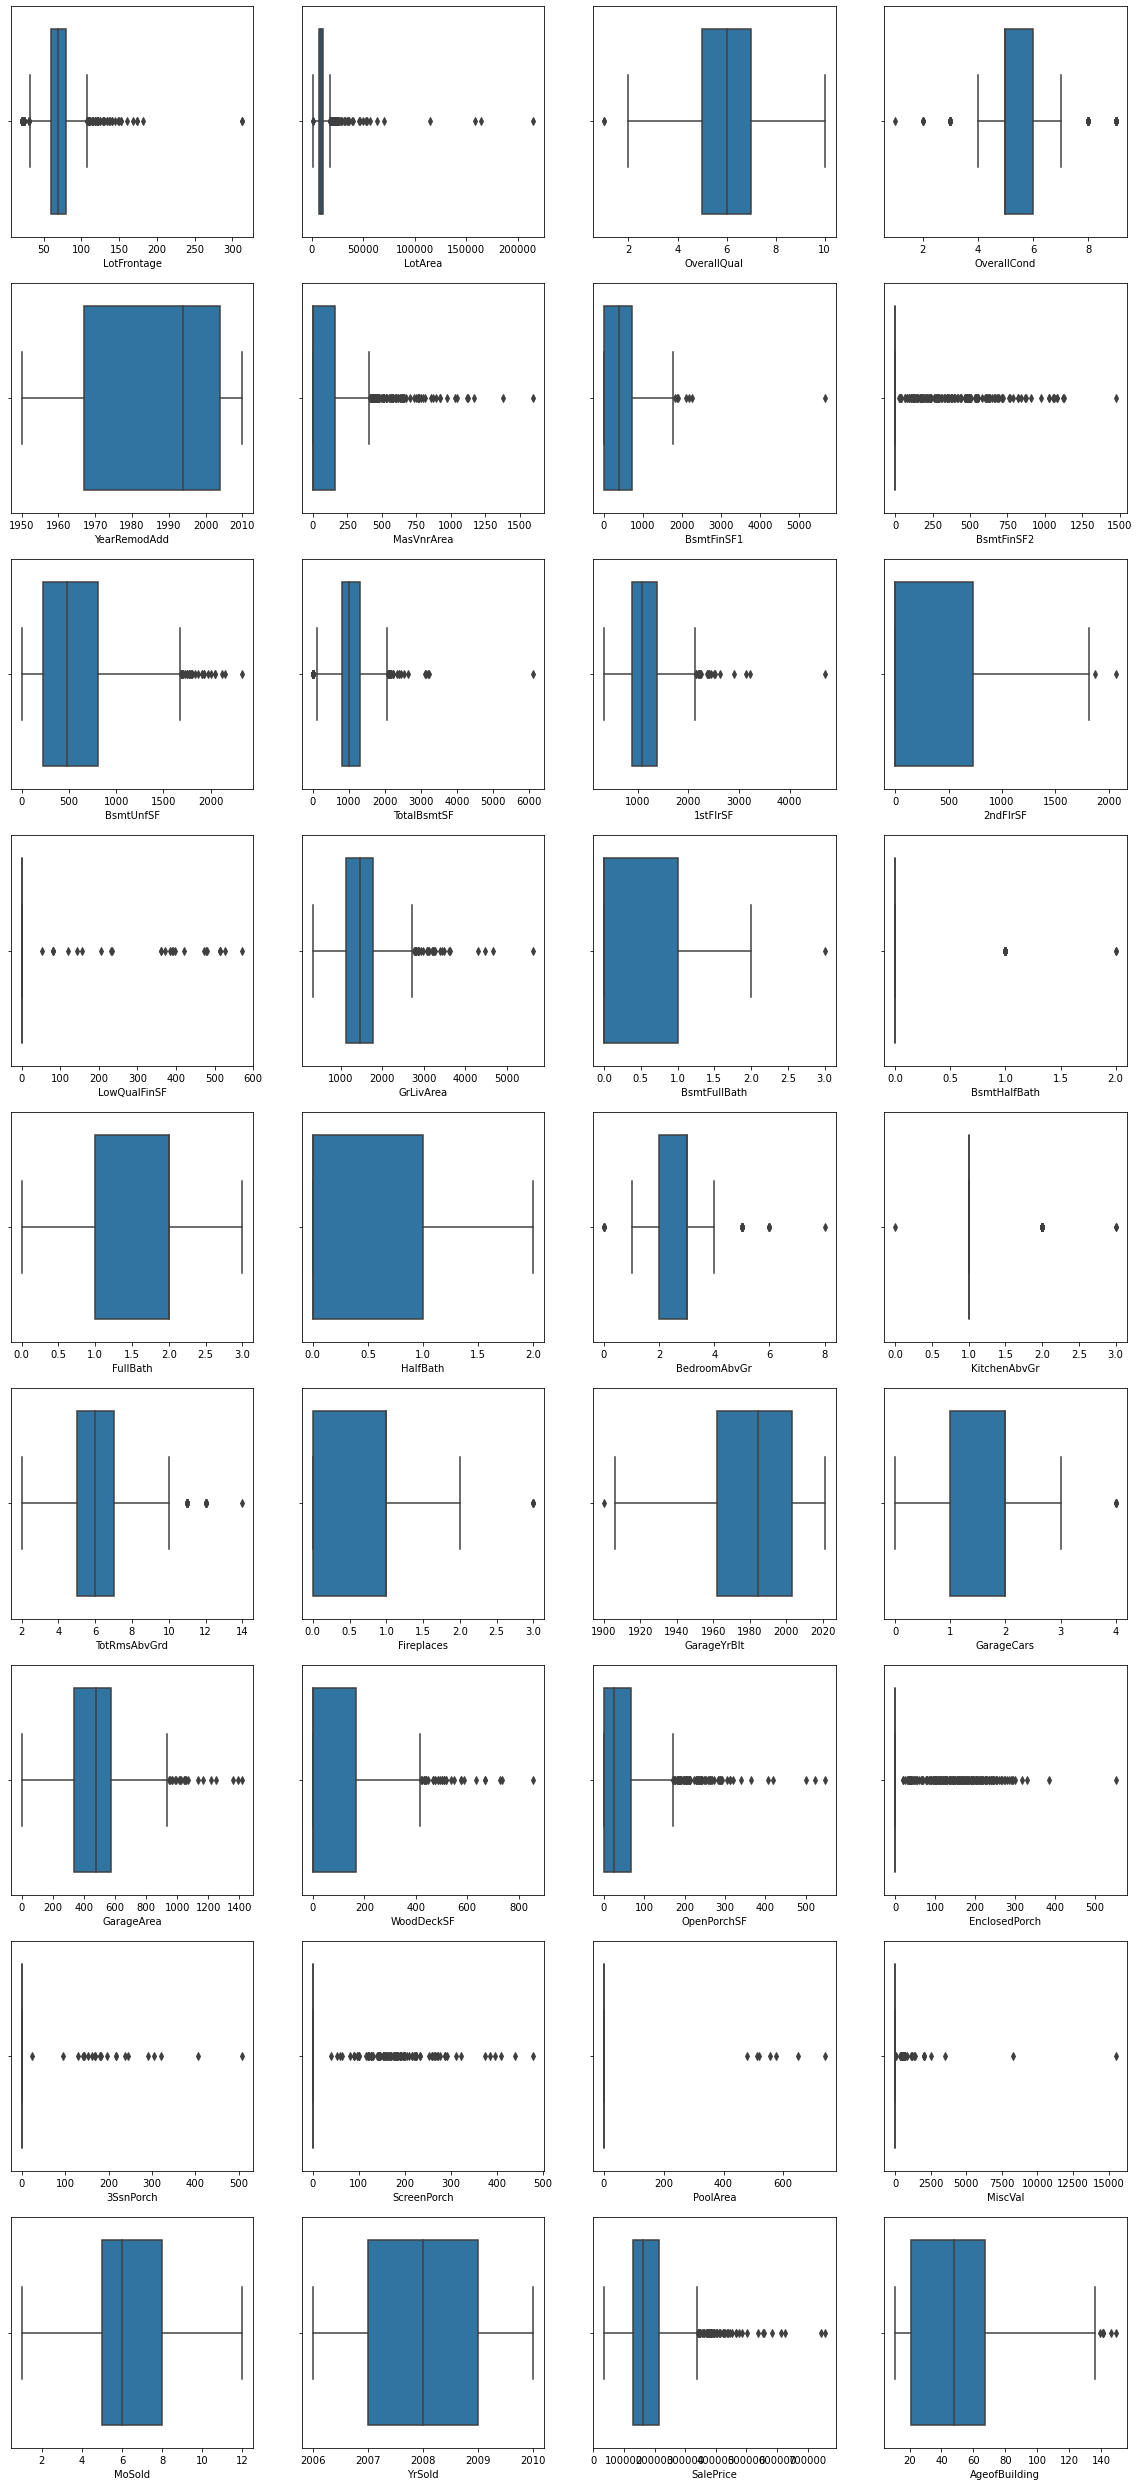

In [2614]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,50))
for i,val in enumerate(numerical_columns):
#     plt.title(val)
    plt.subplot(10,4,i+1)
    sns.boxplot(df[val])

In [2615]:
#helper function to treat the outliers the values thare greater than 1.5*IQR and less than 1.5*IQR are removed
def func_outlier_treatment(col,house_df):
    Q3 = house_df[col].quantile(.75)
    Q1 = house_df[col].quantile(.25)
    IQR = Q3 - Q1
    print("Q1,Q3,IQR",Q1,Q3,IQR)
    house_df = house_df[~(house_df[col]<(Q1-1.5*IQR)) & ~(house_df[col]>(Q3+1.5*IQR))]
    return house_df

Looking at one column at a time
starting with columns that have very startling outliers


### Column LotArea

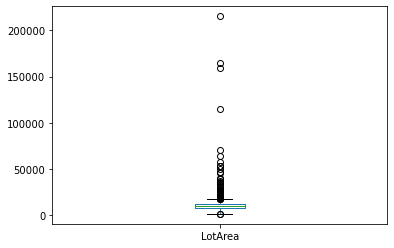

In [2616]:
df["LotArea"].plot.box()

Q1,Q3,IQR 7553.5 11601.5 4048.0


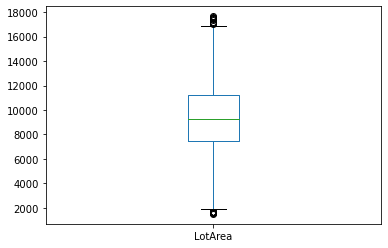

In [2617]:
#outlier treatment using the helper function
df = func_outlier_treatment("LotArea",df)
#Plotting again to recheck
df["LotArea"].plot.box()

In [2618]:
#Rechecking 
df["LotArea"].describe()

count     1391.000000
mean      9272.537024
std       3196.732418
min       1491.000000
25%       7429.000000
50%       9286.000000
75%      11231.500000
max      17671.000000
Name: LotArea, dtype: float64

###  Column LotFrontage

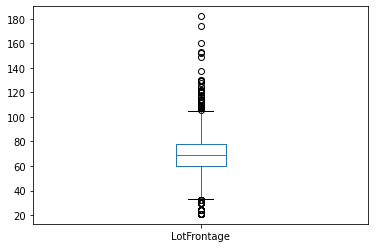

In [2619]:
df["LotFrontage"].plot.box()

Q1,Q3,IQR 60.0 78.0 18.0


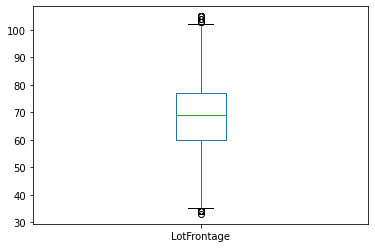

In [2620]:
#outlier treatment
df = func_outlier_treatment("LotFrontage",df)
df["LotFrontage"].plot.box()

###  Column BsmtFinSF1

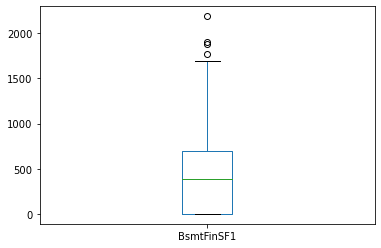

In [2621]:
df.BsmtFinSF1.plot.box()

Q1,Q3,IQR 0.0 699.75 699.75


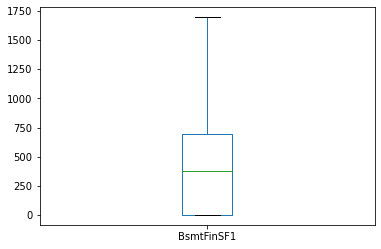

In [2622]:
#outlier treatment
df = func_outlier_treatment("BsmtFinSF1",df)
df["BsmtFinSF1"].plot.box()

In [2623]:
df.BsmtFinSF1.describe()

count    1286.000000
mean      425.185848
std       412.716242
min         0.000000
25%         0.000000
50%       381.000000
75%       697.000000
max      1696.000000
Name: BsmtFinSF1, dtype: float64

###  Column BsmtFinSF2

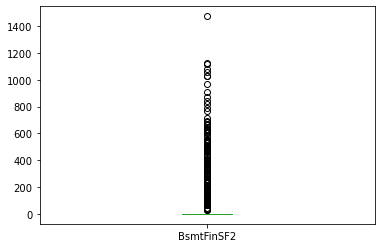

In [2624]:
df.BsmtFinSF2.plot.box()

In [2625]:
df.BsmtFinSF2.describe()

count    1286.000000
mean       42.748834
std       151.259202
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1474.000000
Name: BsmtFinSF2, dtype: float64

In [2626]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
df.drop("BsmtFinSF2",axis=1,inplace=True)
numerical_columns.remove("BsmtFinSF2")

###  Column TotalBsmtSF

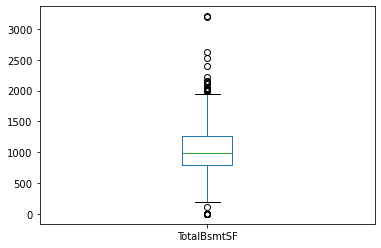

In [2627]:
df.TotalBsmtSF.plot.box()

Q1,Q3,IQR 799.25 1260.75 461.5


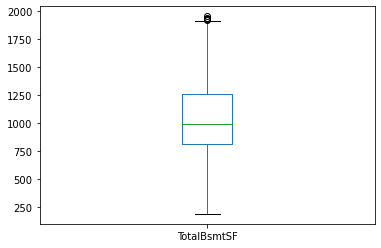

In [2628]:
#outlier treatment
df = func_outlier_treatment("TotalBsmtSF",df)
df["TotalBsmtSF"].plot.box()

In [2629]:
df.TotalBsmtSF.describe()

count    1230.000000
mean     1049.855285
std       327.230487
min       190.000000
25%       816.000000
50%       992.000000
75%      1256.750000
max      1952.000000
Name: TotalBsmtSF, dtype: float64

###  Column LowQualFinSF

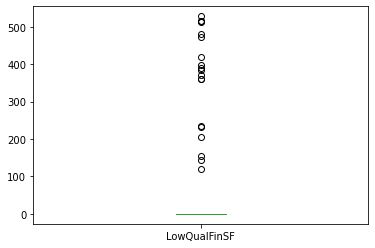

In [2630]:
df.LowQualFinSF.plot.box()

In [2631]:
df.LowQualFinSF.value_counts()

0      1211
360       2
390       1
515       1
514       1
513       1
481       1
473       1
420       1
397       1
384       1
120       1
371       1
234       1
232       1
205       1
156       1
144       1
528       1
Name: LowQualFinSF, dtype: int64

In [2632]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
df.drop("LowQualFinSF",axis=1,inplace=True)
numerical_columns.remove("LowQualFinSF")

###  Column BsmtHalfBath

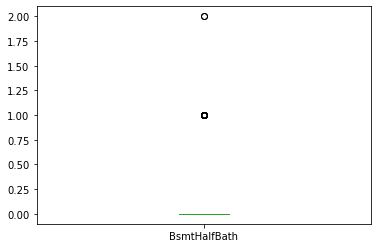

In [2633]:
df.BsmtHalfBath.plot.box()

In [2634]:
df.KitchenAbvGr.value_counts()

1    1182
2      45
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [2635]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
df.drop("BsmtHalfBath",axis=1,inplace=True)
numerical_columns.remove("BsmtHalfBath")

###  Column KitchenAbvGr

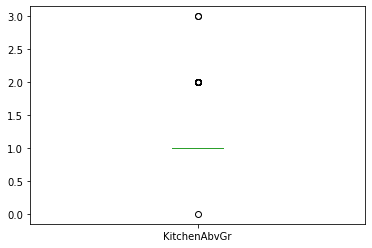

In [2636]:
df.KitchenAbvGr.plot.box()

In [2637]:
df.KitchenAbvGr.value_counts()

1    1182
2      45
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [2638]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
df.drop("KitchenAbvGr",axis=1,inplace=True)
numerical_columns.remove("KitchenAbvGr")

###  Column EnclosedPorch

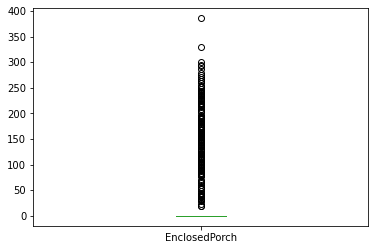

In [2639]:
df.EnclosedPorch.plot.box()

In [2640]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
df.drop("EnclosedPorch",axis=1,inplace=True)
numerical_columns.remove("EnclosedPorch")

###  Column 3SsnPorch

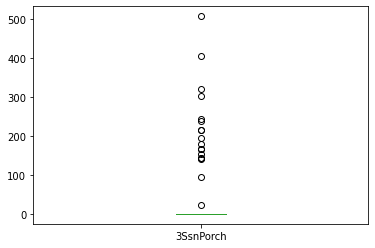

In [2641]:
df["3SsnPorch"].plot.box()

In [2642]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
df.drop("3SsnPorch",axis=1,inplace=True)
numerical_columns.remove("3SsnPorch")

###  Column ScreenPorch

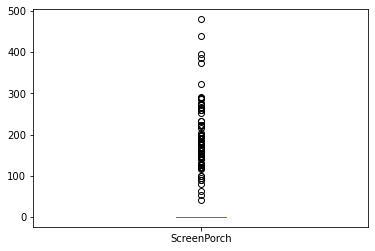

In [2643]:
df.ScreenPorch.plot.box()

In [2644]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
df.drop("ScreenPorch",axis=1,inplace=True)
numerical_columns.remove("ScreenPorch")

###  Column PoolArea

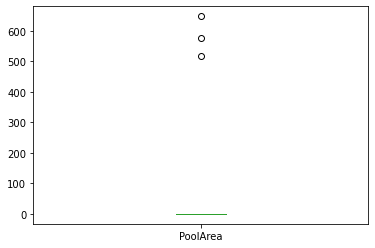

In [2645]:
df.PoolArea.plot.box()

In [2646]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
df.drop("PoolArea",axis=1,inplace=True)
numerical_columns.remove("PoolArea")

###  Column MasVnrArea

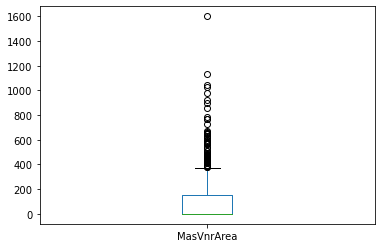

In [2647]:
df.MasVnrArea.plot.box()

Q1,Q3,IQR 0.0 150.5 150.5


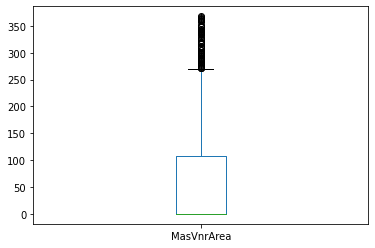

In [2648]:
#outlier treatment
df = func_outlier_treatment("MasVnrArea",df)
df["MasVnrArea"].plot.box()

In [2649]:
df.MasVnrArea.describe()

count    1157.000000
mean       62.657736
std       100.609477
min         0.000000
25%         0.000000
50%         0.000000
75%       108.000000
max       368.000000
Name: MasVnrArea, dtype: float64

###  Column MiscVal

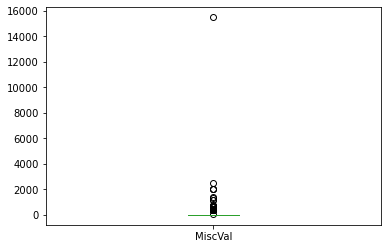

In [2650]:
df.MiscVal.plot.box()

In [2651]:
#Since Q3 value is 0 there is no variance in data after outliers are removed hence the column can be deleted
df.drop("MiscVal",axis=1,inplace=True)
numerical_columns.remove("MiscVal")

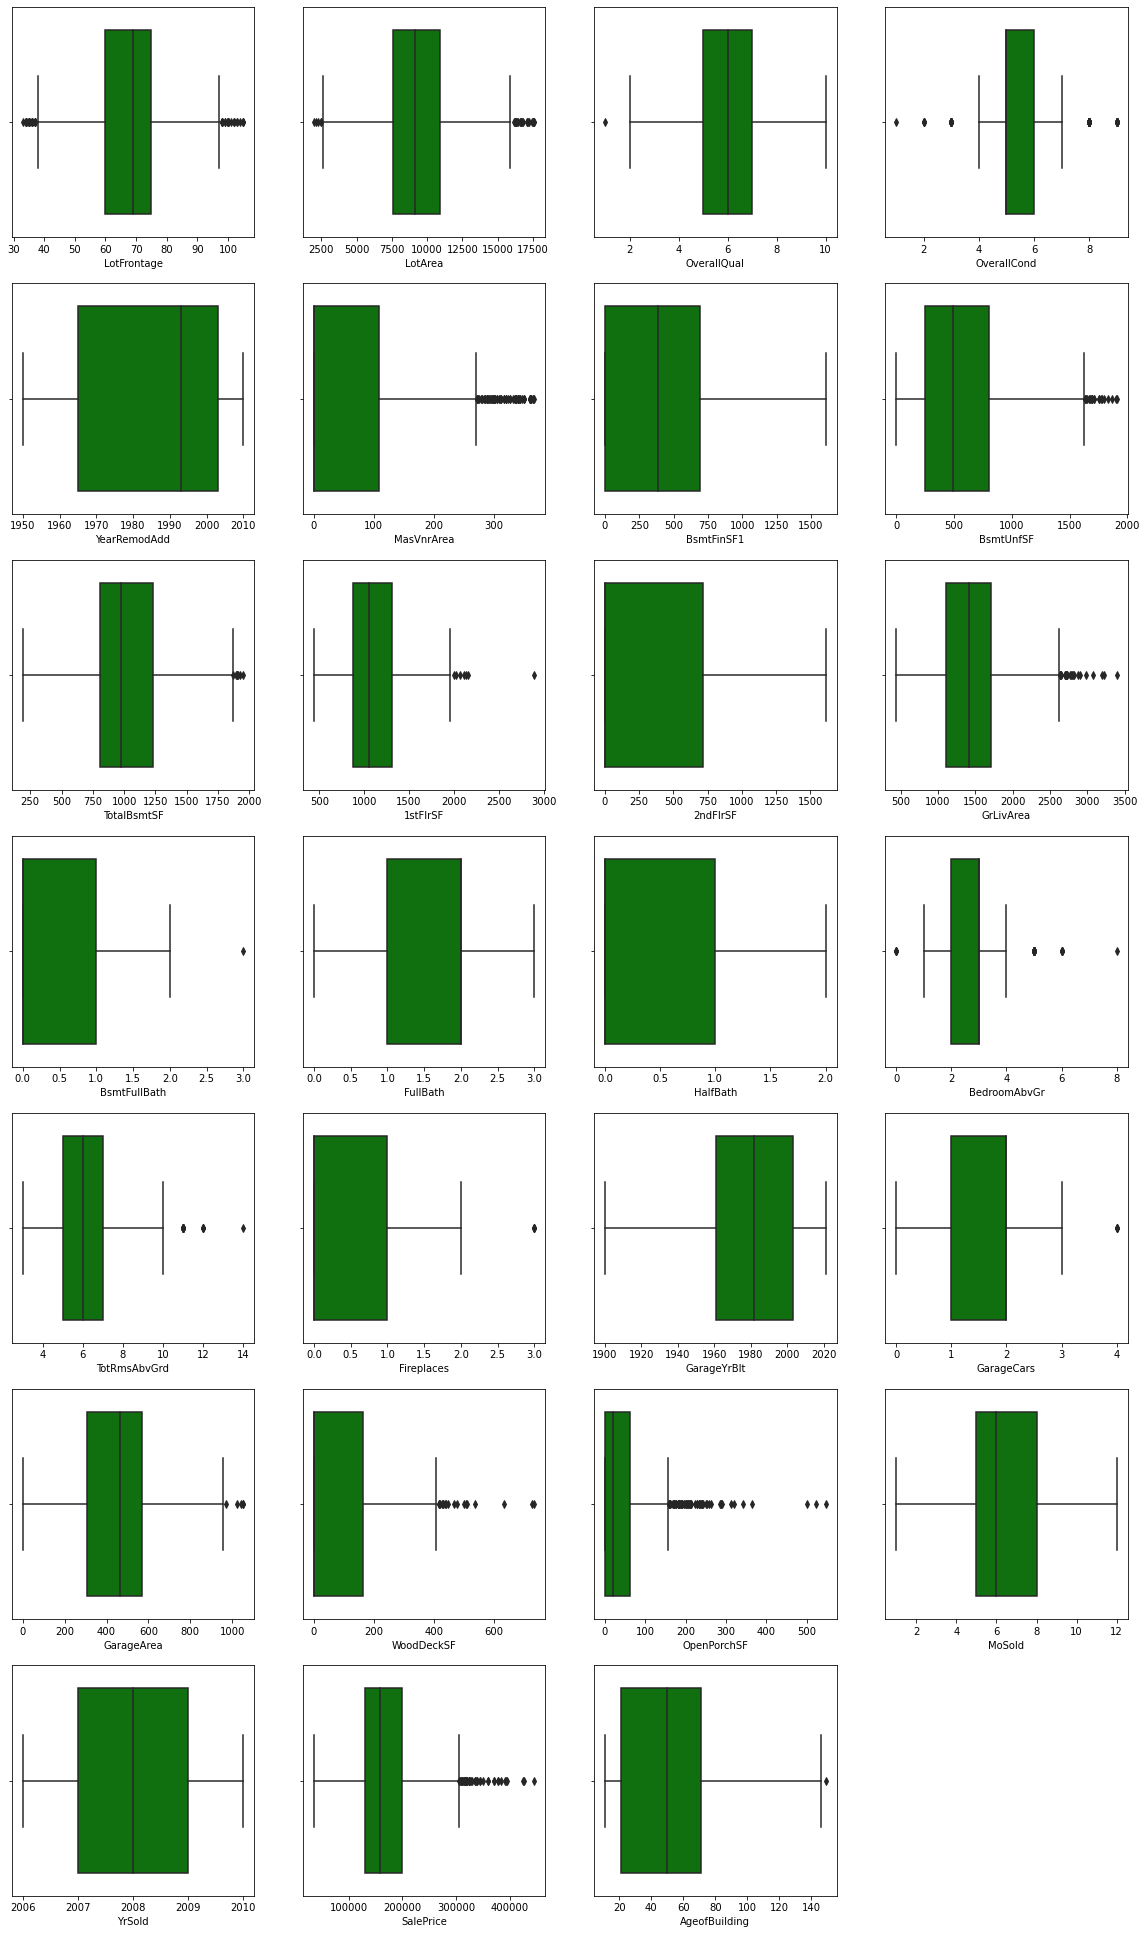

In [2652]:
#Rechecking the box plot for outliers
plt.figure(figsize=(20,50))
for i,val in enumerate(numerical_columns):
    plt.subplot(10,4,i+1)
    sns.boxplot(df[val], color="green")

### Visually Checking if there is relationship between target SalePrice and other columns

In [2653]:
df_columns = list(df.columns)
# Removing SalePrice from columns
df_columns.remove("SalePrice")
print(df_columns,"Length is: ", len(df_columns))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'AgeofBuilding'] Length is:  70


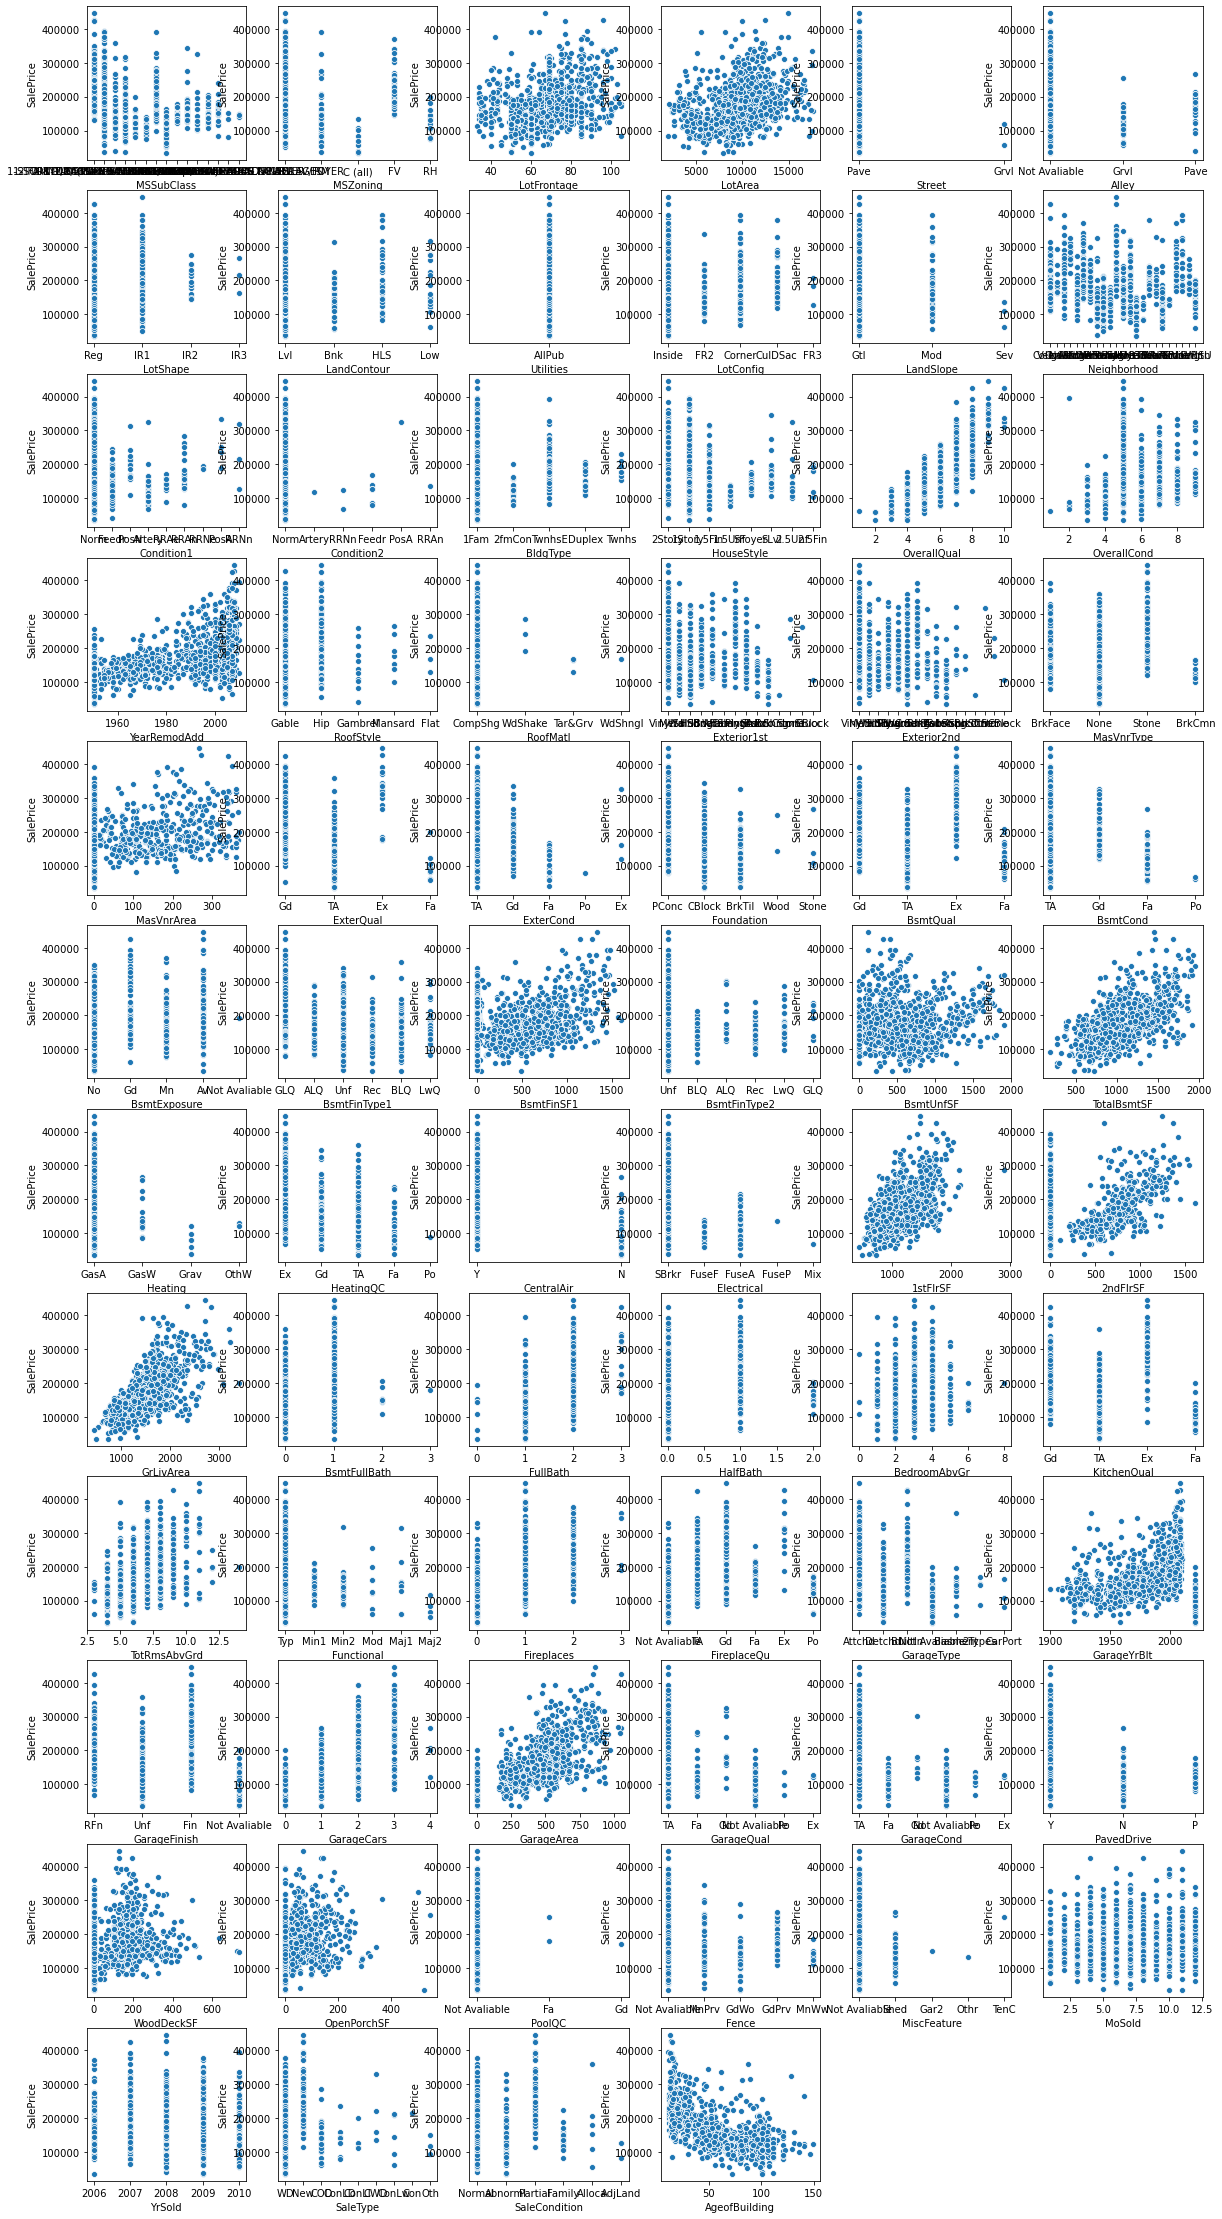

In [2654]:
plt.figure(figsize=(20,40))
for i,col in enumerate(df_columns):
    plt.subplot(12,6,i+1)
    sns.scatterplot(df[col],df["SalePrice"])

#### Correlation among numerical cols

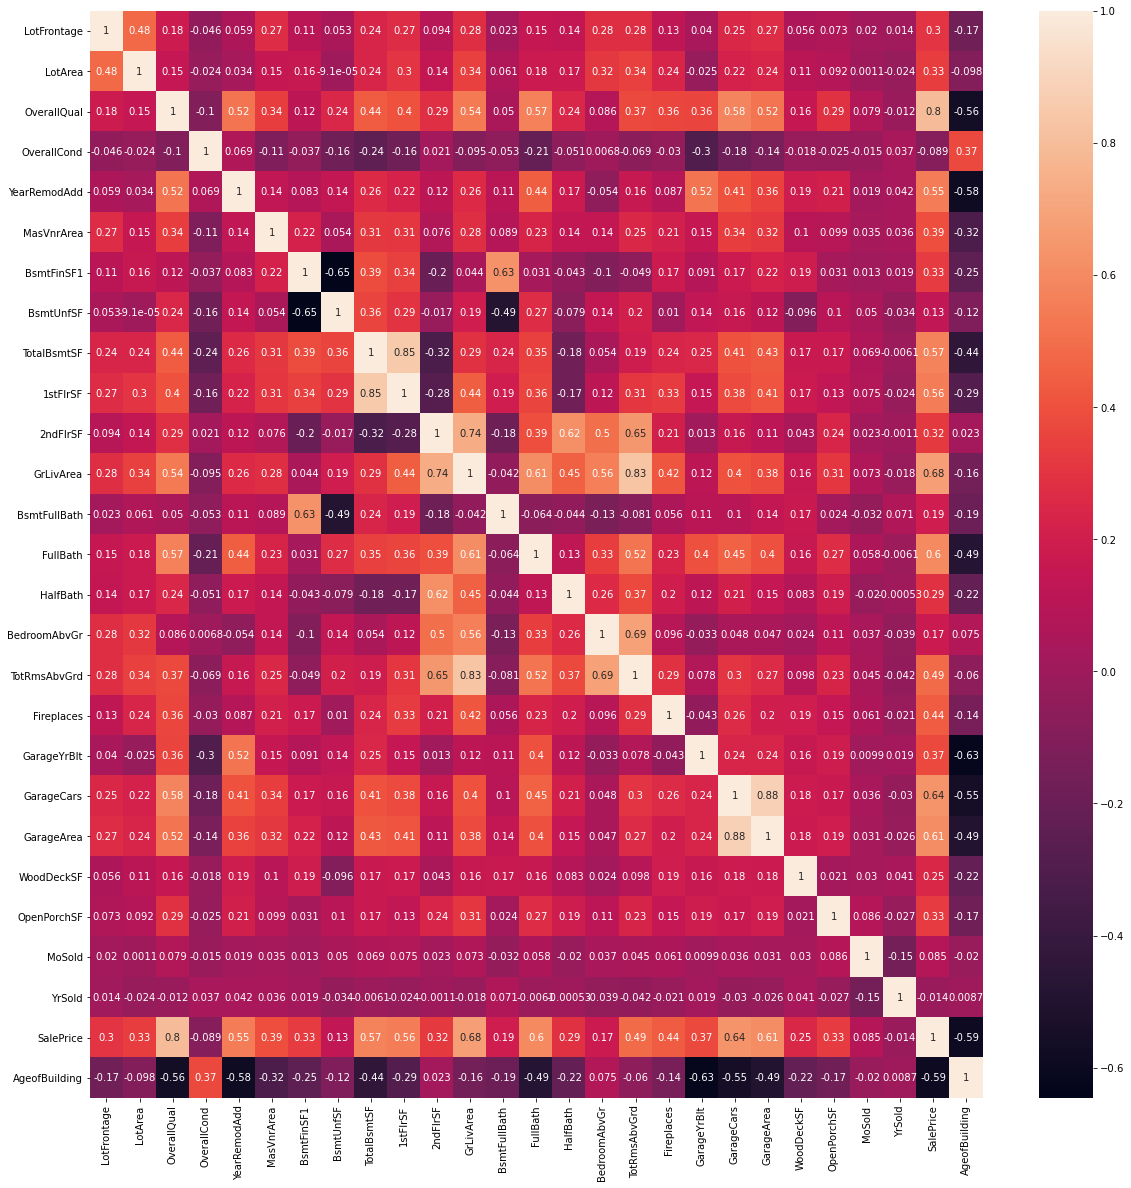

In [2655]:
# Checking for correlated columns
plt.figure(figsize =(20,20))
sns.heatmap(df[numerical_columns].corr(),annot =True);

* The column GarageYrBlt has high correlation with YearBuilt and GarageArea 
* The column TotalBsmtSF and 1stFlrSF are correlated
* The column TotRmsAbvGrd is highly correlated with GrLivArea, BedroomAbvGr
* The column GrLivArea is correlated with 2ndFlrSF
* GarageArea and GargeCars are correlated

In [2656]:
#Dropping the highly correlated columns
df.drop(["GarageYrBlt","TotRmsAbvGrd","2ndFlrSF","TotalBsmtSF","GarageCars"],axis=1,inplace=True)

In [2657]:
#Updating the numerical columns 
numerical_columns.remove("GarageYrBlt")
numerical_columns.remove("TotRmsAbvGrd")
numerical_columns.remove("2ndFlrSF")
numerical_columns.remove("TotalBsmtSF")
numerical_columns.remove("GarageCars")

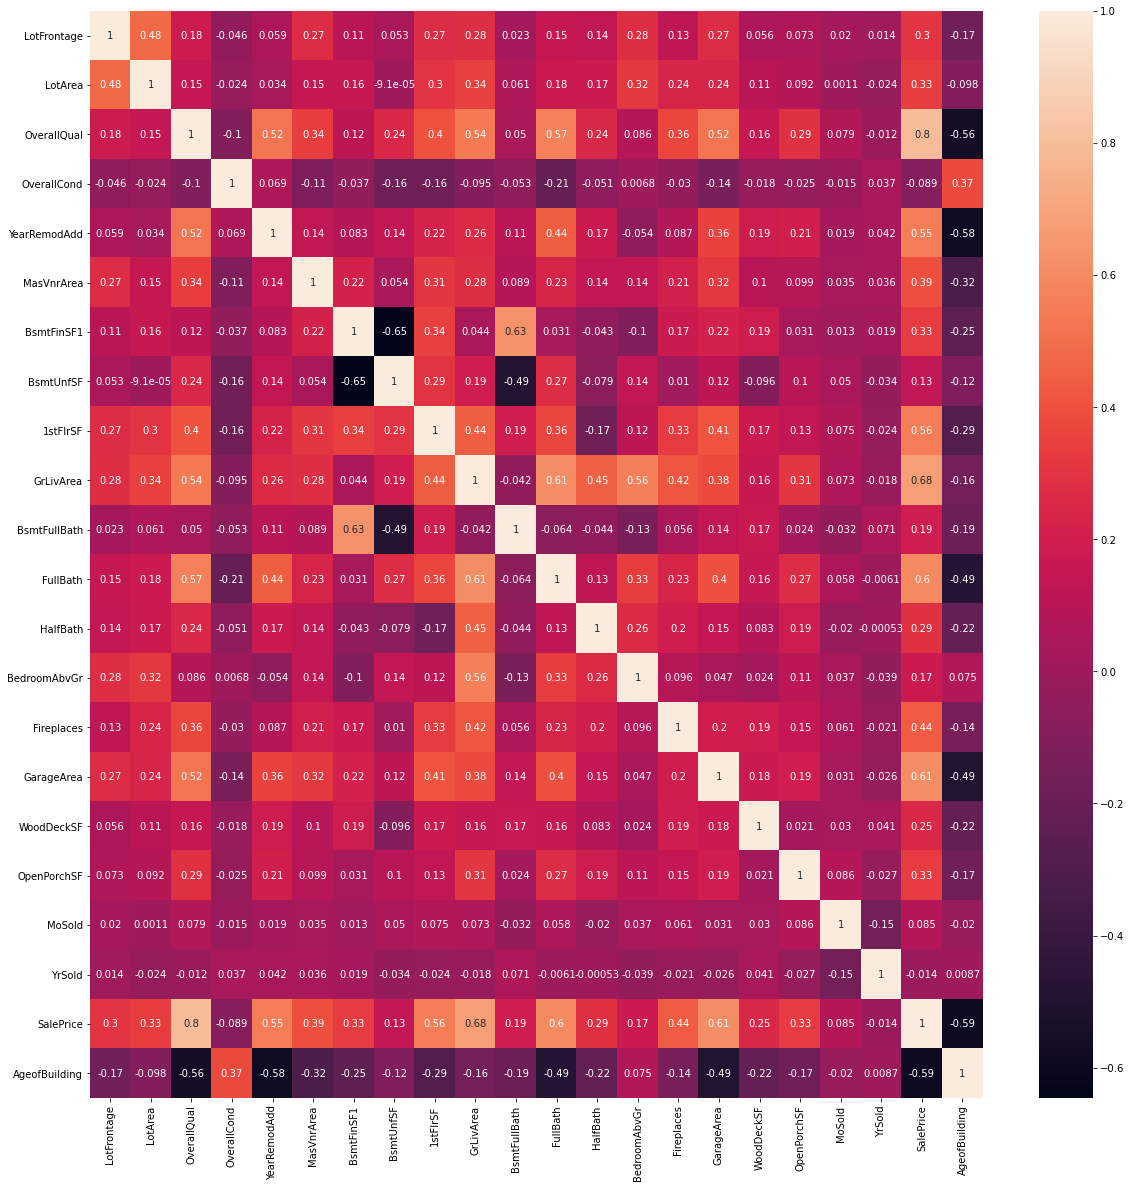

In [2658]:
# Checking for correlated columns
plt.figure(figsize =(20,20))
sns.heatmap(df[numerical_columns].corr(),annot =True);

#### Categorical Columns

In [2659]:
cat_columns = list(df.select_dtypes(include = "object").columns)
print("Categorical Columns: ",cat_columns,"Number of Categorical columns is: ",len(cat_columns))

Categorical Columns:  ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'] Number of Categorical columns is:  44


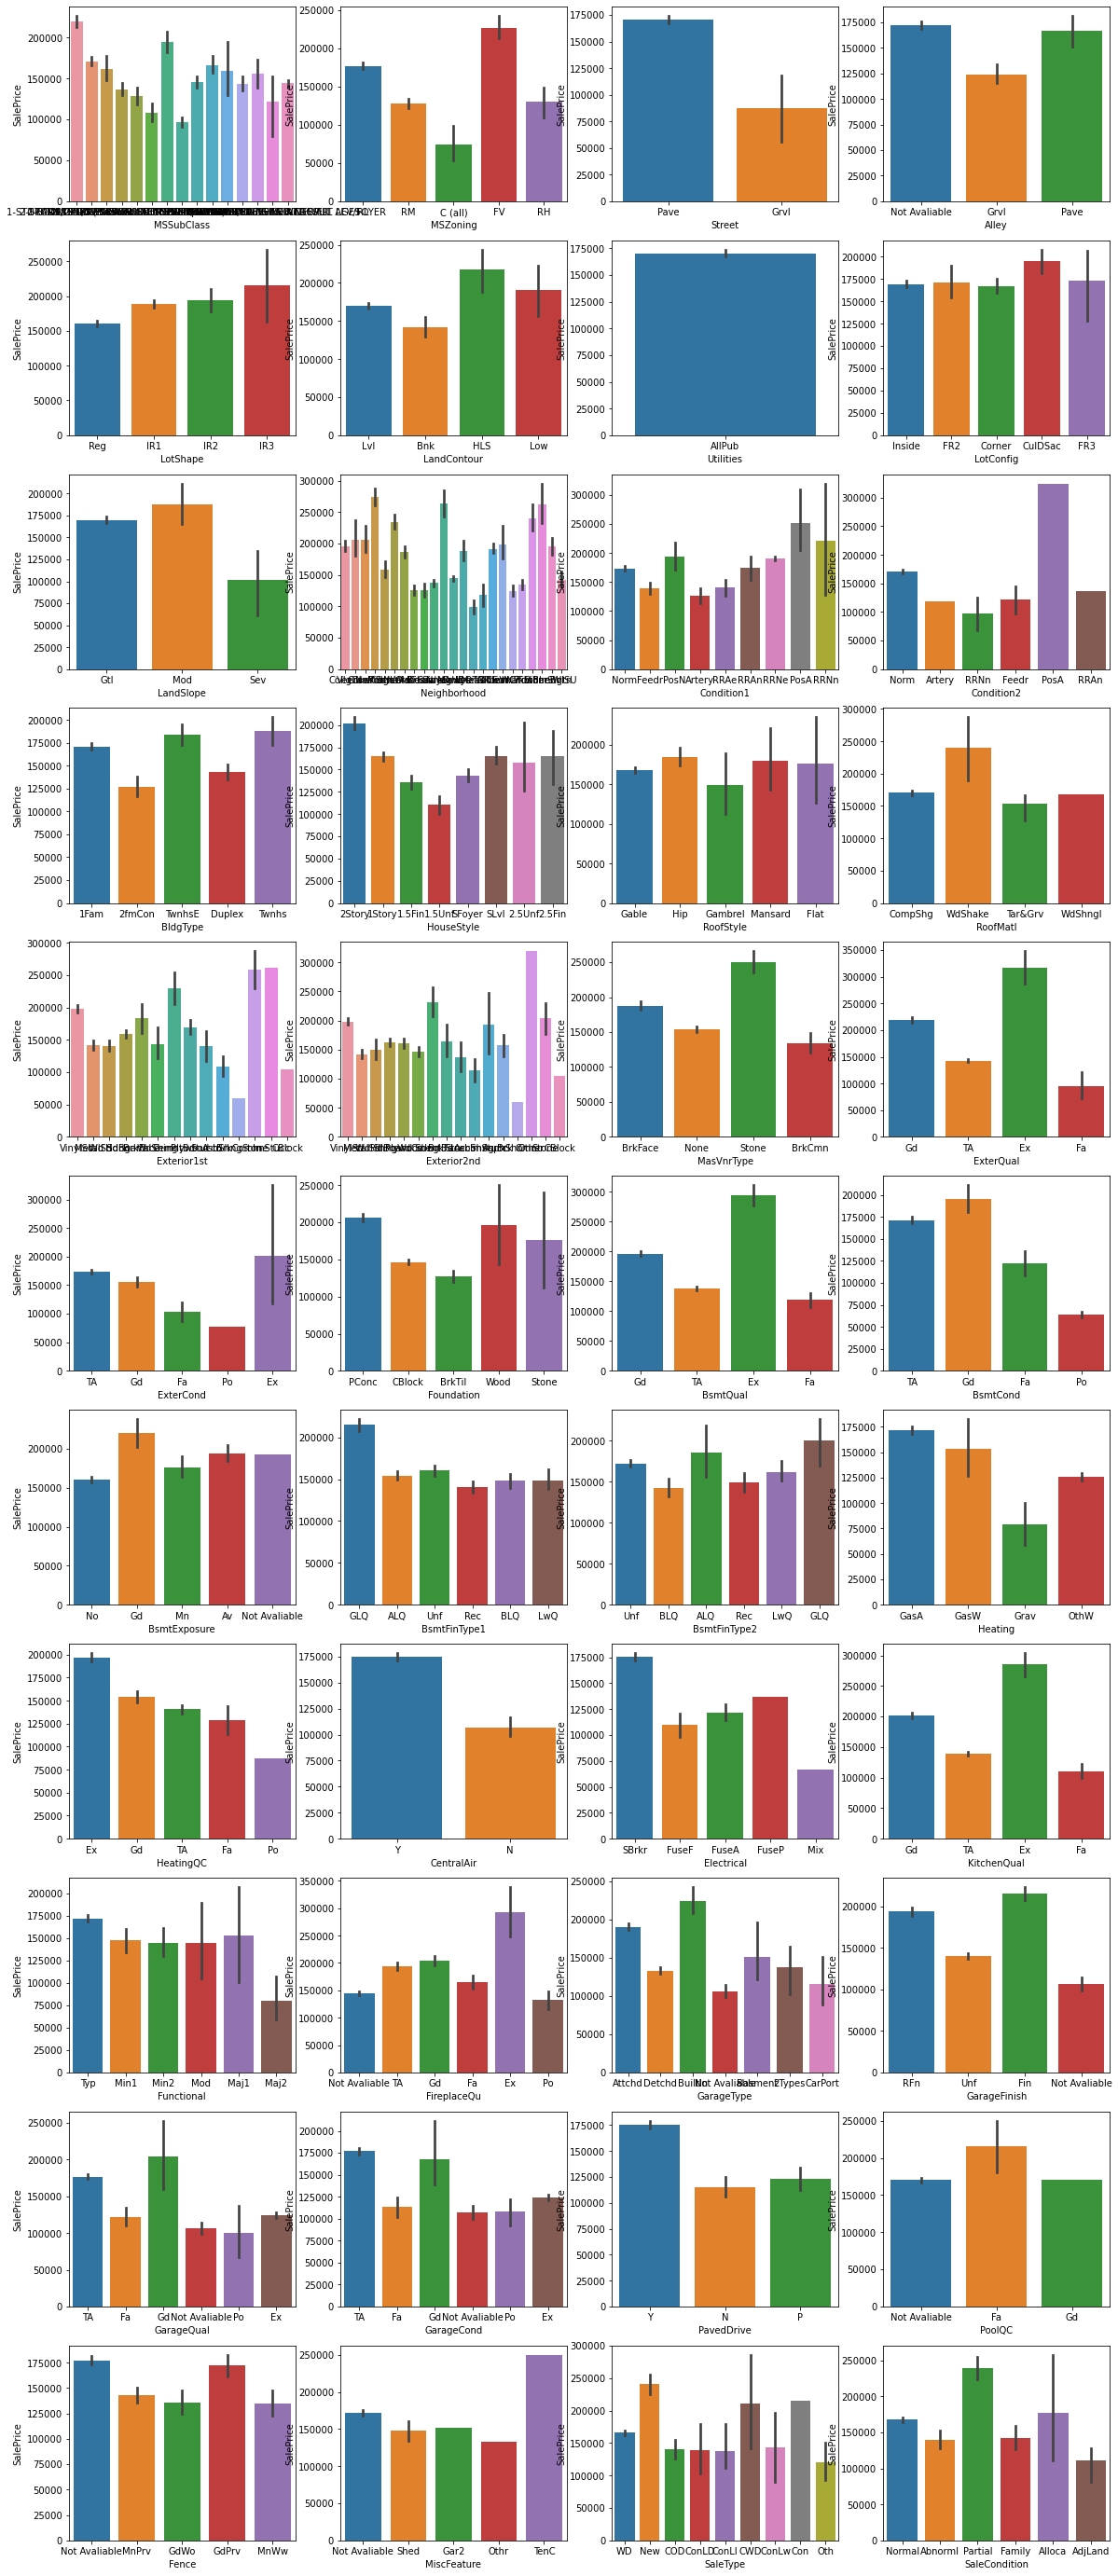

In [2660]:
#Checking for any visual realtion between categorical columns and SalePrice
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,50))

for i,val in enumerate(cat_columns):
   
    plt.subplot(11,4,i+1)
    sns.barplot(data = df, x= val,y="SalePrice")

### Step4 Data Preparation 


#### 1 Inspecting Target Variable Distribution

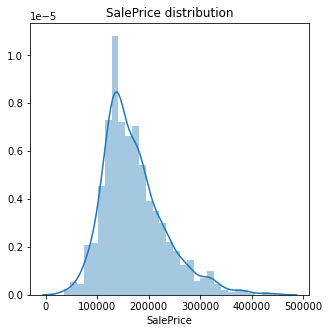

In [2661]:
plt.figure(figsize=(5,5))
plt.title("SalePrice distribution")
sns.distplot(df["SalePrice"])

###### Observation 
The distribution is a little left skewed. Hence a log transform will be applied ad checked if it solves the issue.

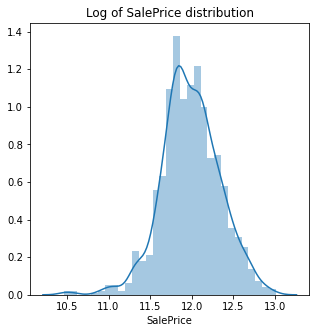

In [2662]:
import numpy as np
plt.figure(figsize=(5,5))
plt.title("Log of SalePrice distribution")
sns.distplot(np.log(df["SalePrice"]))

In [2663]:
#Storing the transformed price as the target and deleting the actual SalePrice
df['TransformPrice'] = np.log(df['SalePrice'])
df.drop("SalePrice",axis =1,inplace=True)

In [2664]:
#Updating the numerical column list
numerical_columns.remove("SalePrice")
numerical_columns.append("TransformPrice")

In [2665]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street  \
0             2-STORY 1946 & NEWER       RL         65.0     8450   Pave   
1  1-STORY 1946 & NEWER ALL STYLES       RL         80.0     9600   Pave   
2             2-STORY 1946 & NEWER       RL         68.0    11250   Pave   
3             2-STORY 1945 & OLDER       RL         60.0     9550   Pave   
4             2-STORY 1946 & NEWER       RL         84.0    14260   Pave   

           Alley LotShape LandContour Utilities LotConfig LandSlope  \
0  Not Avaliable      Reg         Lvl    AllPub    Inside       Gtl   
1  Not Avaliable      Reg         Lvl    AllPub       FR2       Gtl   
2  Not Avaliable      IR1         Lvl    AllPub    Inside       Gtl   
3  Not Avaliable      IR1         Lvl    AllPub    Corner       Gtl   
4  Not Avaliable      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
0      CollgCr       Norm       Norm     1Fam     2Story            7   
1      Veenker      Feedr       Norm     1Fam     1Story            6   
2      CollgCr       Norm       Norm     1Fam     2Story            7   
3      Crawfor       Norm       Norm     1Fam     2Story            7   
4      NoRidge       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0            5          2003     Gable  CompShg     VinylSd     VinylSd   
1            8          1976     Gable  CompShg     MetalSd     MetalSd   
2            5          2002     Gable  CompShg     VinylSd     VinylSd   
3            5          1970     Gable  CompShg     Wd Sdng     Wd Shng   
4            5          2000     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF Heating  \
0           No          GLQ         706          Unf        150    GasA   
1           Gd          ALQ         978          Unf        284    GasA   
2           Mn          GLQ         486          Unf        434    GasA   
3           No          ALQ         216          Unf        540    GasA   
4           Av          GLQ         655          Unf        490    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  GrLivArea  BsmtFullBath  \
0        Ex          Y      SBrkr       856       1710             1   
1        Ex          Y      SBrkr      1262       1262             0   
2        Ex          Y      SBrkr       920       1786             1   
3        Gd          Y      SBrkr       961       1717             1   
4        Ex          Y      SBrkr      1145       2198             1   

   FullBath  HalfBath  BedroomAbvGr KitchenQual Functional  Fireplaces  \
0         2         1             3          Gd        Typ           0   
1         2         0             3          TA        Typ           1   
2         2         1             3          Gd        Typ           1   
3         1         0             3          Gd        Typ           1   
4         2         1             4          Gd        Typ           1   

     FireplaceQu GarageType GarageFinish  GarageArea GarageQual GarageCond  \
0  Not Avaliable     Attchd          RFn         548         TA         TA   
1             TA     Attchd          RFn         460         TA         TA   
2             TA     Attchd          RFn         608         TA         TA   
3             Gd     Detchd          Unf         642         TA         TA   
4             TA     Attchd          RFn         836         TA     

#### 2. Creating Dummy variables for categorical variables

In [2666]:
#create dummies with pandas function
dums = pd.get_dummies(df[cat_columns],drop_first =True)

In [2667]:
dums.shape

(1157, 217)

In [2668]:
#drop the categorical values and concat the dummies
df =df.drop(cat_columns,axis=1)
df = pd.concat([df,dums],axis=1)

In [2669]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 0 to 1459
Columns: 239 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(19), uint8(217)
memory usage: 485.4 KB


In [2670]:
#Checking Data frame
df.head()

LotFrontage  LotArea  OverallQual  OverallCond  YearRemodAdd  MasVnrArea  \
0         65.0     8450            7            5          2003       196.0   
1         80.0     9600            6            8          1976         0.0   
2         68.0    11250            7            5          2002       162.0   
3         60.0     9550            7            5          1970         0.0   
4         84.0    14260            8            5          2000       350.0   

   BsmtFinSF1  BsmtUnfSF  1stFlrSF  GrLivArea  BsmtFullBath  FullBath  \
0         706        150       856       1710             1         2   
1         978        284      1262       1262             0         2   
2         486        434       920       1786             1         2   
3         216        540       961       1717             1         1   
4         655        490      1145       2198             1         2   

   HalfBath  BedroomAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0         1             3           0         548           0           61   
1         0             3           1         460         298            0   
2         1             3           1         608           0           42   
3         0             3           1         642           0           35   
4         1             4           1         836         192           84   

   MoSold  YrSold  AgeofBuilding  TransformPrice  \
0       2    2008             18       12.247694   
1       5    2007             45       12.109011   
2       9    2008             20       12.317167   
3       2    2006            106       11.849398   
4      12    2008             21       12.429216   

   MSSubClass_1-1/2 STORY FINISHED ALL AGES  MSSubClass_1-STORY 1945 & OLDER  \
0                                         0                                0   
1                                         0                                0   
2                                         0                                0   
3                                         0                                0   
4                                         0                                0   

   MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
0                                           0   
1                                           1   
2                                           0   
3                                           0   
4                                           0   

   MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
0                                                  0                  
1                                                  0                  
2                                                  0                  
3                                                  0                  
4                                                  0                  

   MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
0                                             0   
1                                             0   
2                                             0   
3                                             0   
4                                             0   

   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
0                                0                                0   
1                                0                                0   
2                                0                                0   
3                                0                                1   
4                                0                                0   

   MSSubClass_2

#### 3. Split data into test and train data

In [2671]:
#using train_test_split from sklearn to split the data in the ratio 70:30 for train and test respectively
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df, test_size=.3,random_state =42)

In [2672]:
print("Train set shape",df_train.shape,"Test set shape",df_test.shape)

Train set shape (809, 239) Test set shape (348, 239)


#### 4. Scale data

In [2673]:
#scaling data with the help of standard scaler
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

df_train[numerical_columns] = scaler.fit_transform(df_train[numerical_columns])
df_test[numerical_columns] = scaler.transform(df_test[numerical_columns])

In [2674]:
df_train.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearRemodAdd  \
1175     1.237197  0.515400     1.619393    -0.559731      0.748200   
753      0.875890  0.361638     1.619393    -0.559731      0.986167   
431     -0.569338 -1.272173    -0.016174     1.212569      0.653013   
780     -0.352553 -0.468608     0.801610    -0.559731      0.557826   
631     -2.448134 -1.621824     1.619393    -0.559731      1.033760   

      MasVnrArea  BsmtFinSF1  BsmtUnfSF  1stFlrSF  GrLivArea  BsmtFullBath  \
1175    2.662500    0.730792   0.991475  3.248731   3.170920     -0.811655   
753     1.109619   -1.033452   1.106058 -0.239202   1.444681     -0.811655   
431    -0.628825   -1.033452   0.791565 -0.079352  -0.562575     -0.811655   
780    -0.257697   -1.033452   1.610709  0.448154  -0.439909     -0.811655   
631     0.425961   -0.972964   2.325023  1.410452   0.231406     -0.811655   

      FullBath  HalfBath  BedroomAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
1175  0.926303  1.280765      1.353523    0.677051    0.468881   -0.760812   
753   0.926303  1.280765      0.143578    0.677051    2.161666    0.918054   
431  -0.956559 -0.711810      1.353523   -0.892388   -2.248618   -0.760812   
780   0.926303 -0.711810      0.143578    0.677051   -0.229330    1.162889   
631   0.926303 -0.711810     -1.066367    0.677051    0.900868    0.603267   

      OpenPorchSF    MoSold    YrSold  AgeofBuilding  TransformPrice  \
1175    -0.146328 -0.850386 -0.623698      -0.722235        1.671799   
753      0.179361 -1.220656 -1.371212      -1.145042        1.574209   
431      0.967870  1.000965  0.123816       1.619470       -1.988990   
780     -0.352026 -0.109845 -0.623698      -0.819806        0.284286   
631      0.539332  0.630695 -0.623698      -1.177566        0.785857   

      MSSubClass_1-1/2 STORY FINISHED ALL AGES  \
1175                                         1   
753                                          0   
431                                          1   
780                                          0   
631                                          0   

      MSSubClass_1-STORY 1945 & OLDER  \
1175                                0   
753                                 0   
431                                 0   
780                                 0   
631                                 0   

      MSSubClass_1-STORY 1946 & NEWER ALL STYLES  \
1175                                           0   
753                                            0   
431                                            0   
780                                            1   
631                                            0   

      MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER  \
1175                                                  0                  
753                                                   0                  
431                                                   0                  
780                                                   0                  
631                                                   1                  

      MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  \
1175                                             0   
753                                              0   
431                                              0   
780                                              0   
631                                              0   

      MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES  \
1175                                                  0      
753                                                   0      
431                                                   0      
780                                                   0      
631                                                   0      

      MSSubClass_2-1/2 STORY ALL AGES  MSSubClass_2-STORY 1945 & OLDER  \
1175                                0                                0   
753                                 0                   

In [2675]:
df_train.shape

(809, 239)




### Step 5. Data Split into dependent and independent variables



In [2676]:
# split into X and y
#getting all the columns except the target
total_cols = list(df_train.columns)
total_cols.remove("TransformPrice")
# print(total_cols)

X_train =df_train[total_cols]
y_train=df_train["TransformPrice"]
X_test = df_test[total_cols]
y_test = df_test["TransformPrice"]

### Step 6. Feature Selection using RFE

In [2677]:
#Creating a linear regression model as a base model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [2678]:
# Using RFE to select the features
from sklearn.feature_selection import RFE
rfe = RFE(lr,n_features_to_select =40)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=40)

In [2679]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 184),
 ('LotArea', False, 102),
 ('OverallQual', False, 32),
 ('OverallCond', False, 50),
 ('YearRemodAdd', False, 130),
 ('MasVnrArea', False, 161),
 ('BsmtFinSF1', False, 84),
 ('BsmtUnfSF', False, 146),
 ('1stFlrSF', False, 41),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 153),
 ('FullBath', False, 168),
 ('HalfBath', False, 149),
 ('BedroomAbvGr', False, 183),
 ('Fireplaces', False, 185),
 ('GarageArea', False, 60),
 ('WoodDeckSF', False, 167),
 ('OpenPorchSF', False, 176),
 ('MoSold', False, 182),
 ('YrSold', False, 169),
 ('AgeofBuilding', False, 35),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', True, 1),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 6),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  False,
  3),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', True, 1),
 ('MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES', True, 1),
 ('MSSubClass_2-1/2 STORY ALL A

In [2680]:
selected_columns = X_train.columns[rfe.support_]
print(selected_columns)

Index(['GrLivArea', 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
       'MSSubClass_1-STORY 1945 & OLDER',
       'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-1/2 STORY ALL AGES', 'MSSubClass_2-STORY 1945 & OLDER',
       'MSSubClass_2-STORY PUD - 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Condition2_RRAn', 'HouseStyle_2.5Fin',
       'RoofMatl_WdShake', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_CBlock', 'ExterCond_Po',
       'Heating_Grav', 'HeatingQC_Po', 'KitchenQual_Fa', 'KitchenQual_Gd',
       'KitchenQual_TA', 'Functional_Maj2', 'GarageFinish_Not Avaliable',
       'GarageQual_Fa', 'GarageQual_Not Avaliable', 'GarageQual_TA',
       'GarageCond_Not Aval

In [2681]:
#Selected columns are only considered now for the train set
X_train_rfe = X_train[selected_columns]

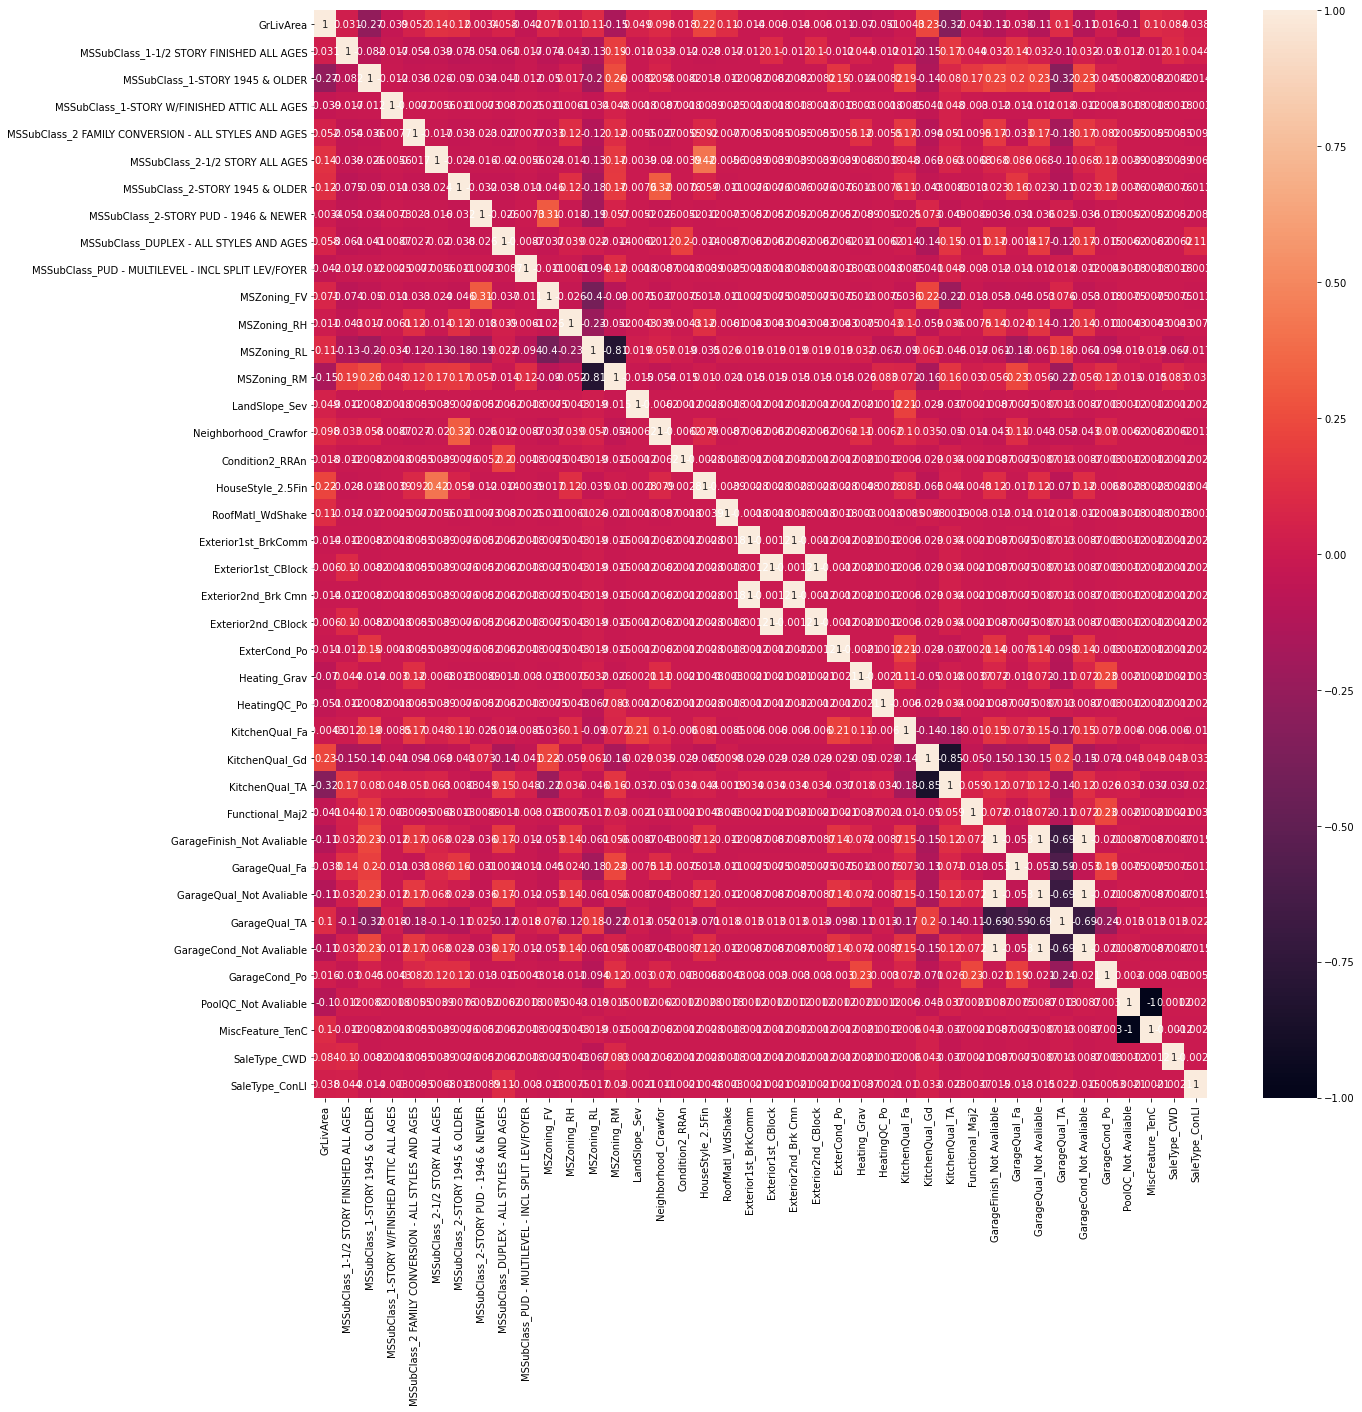

In [2682]:
#Checking for Correlation amonf Columns
plt.figure(figsize=(20,20))
sns.heatmap(X_train_rfe.corr(),annot=True)

There are many columns that have a high correlation. This could be the result of the dummy variable creatin hence they have to be dropped. The columns 'Exterior2nd_CBlock',"Exterior2nd_Brk Cmn",'GarageFinish_Not Avaliable','GarageCond_Not Avaliable',"GarageQual_Not Avaliable","KitchenQual_TA","MSZoning_RM","PoolQC_Not Avaliable" will be dropped

In [2683]:
#Highly_correlated Columns have to be dropped
X_train_rfe.drop(['Exterior2nd_CBlock',"Exterior2nd_Brk Cmn","GarageQual_Fa","GarageFinish_Not Avaliable",'GarageCond_Not Avaliable',"GarageQual_Not Avaliable","KitchenQual_TA","MSZoning_RM","PoolQC_Not Avaliable"],axis=1,inplace=True)
 

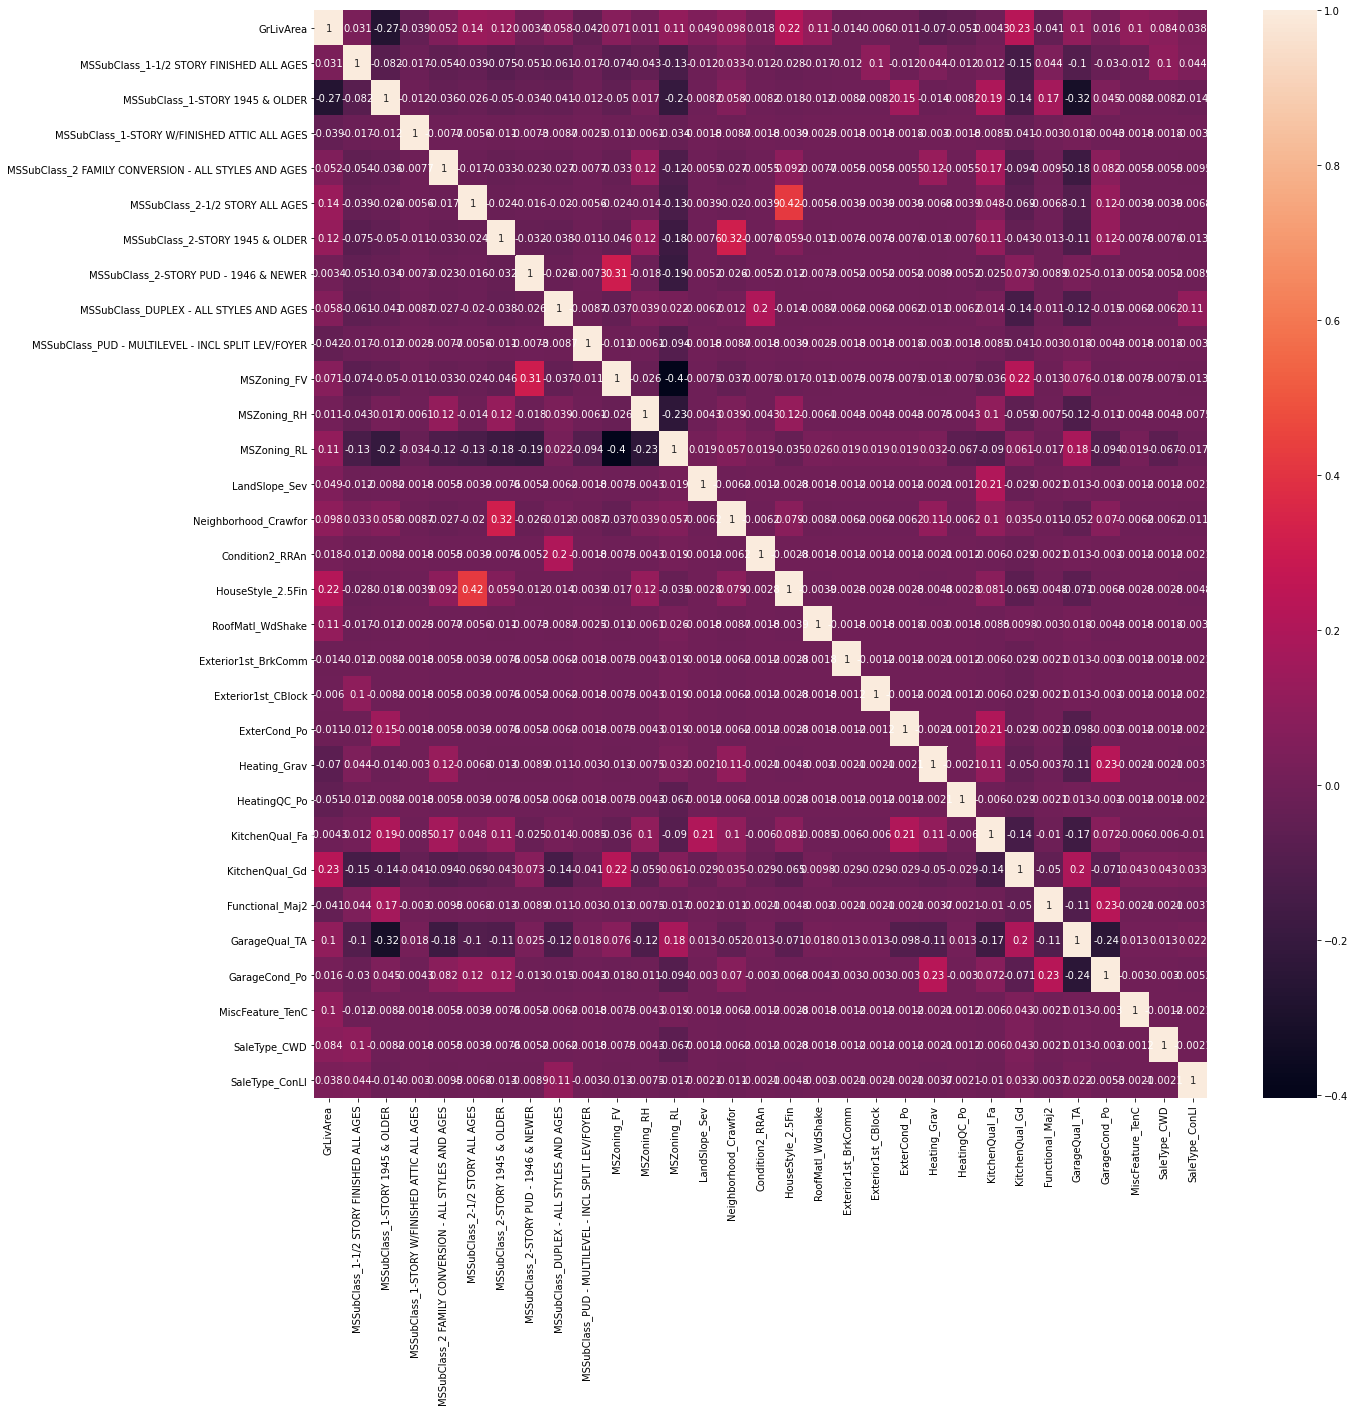

In [2684]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train_rfe.corr(),annot=True)

### Step 7 Calculate the VIFs for model 

In [2685]:
#calculating the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
26                                      GarageQual_TA  6.06
12                                        MSZoning_RL  5.30
24                                     KitchenQual_Gd  2.04
10                                        MSZoning_FV  1.45
16                                  HouseStyle_2.5Fin  1.33
0                                           GrLivArea  1.30
5                     MSSubClass_2-1/2 STORY ALL AGES  1.29
23                                     KitchenQual_Fa  1.27
6                     MSSubClass_2-STORY 1945 & OLDER  1.25
2                     MSSubClass_1-STORY 1945 & OLDER  1.23
14                               Neighborhood_Crawfor  1.22
27                                      GarageCond_Po  1.20
1            MSSubClass_1-1/2 STORY FINISHED ALL AGES  1.16
7               MSSubClass_2-STORY PUD - 1946 & NEWER  1.13
21                                       Heating_Grav  1.13
8             MSSubClass_DUPLEX - ALL STYLES AND AGES  1.12
25                                    Functional_Maj2  1.11
11                                        MSZoning_RH  1.10
4   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...  1.10
20                                       ExterCond_Po  1.07
13                                      LandSlope_Sev  1.06
15                                    Condition2_RRAn  1.05
29                                       SaleType_CWD  1.03
30                                     SaleType_ConLI  1.03
17                                   RoofMatl_WdShake  1.02
9   MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/F...  1.02
28                                   MiscFeature_TenC  1.02
22                                       HeatingQC_Po  1.01
19                                 Exterior1st_CBlock  1.01
3        MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.01
18                                Exterior1st_BrkComm  1.00

##### Analysis
The features with values greater than 5 have to be elliminated since a high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

In [2686]:
#Dropping the column GarageQual_TA since it has a high VIF
X_train_rfe.drop("GarageQual_TA",axis=1, inplace=True)

##### Check corelation with heat map

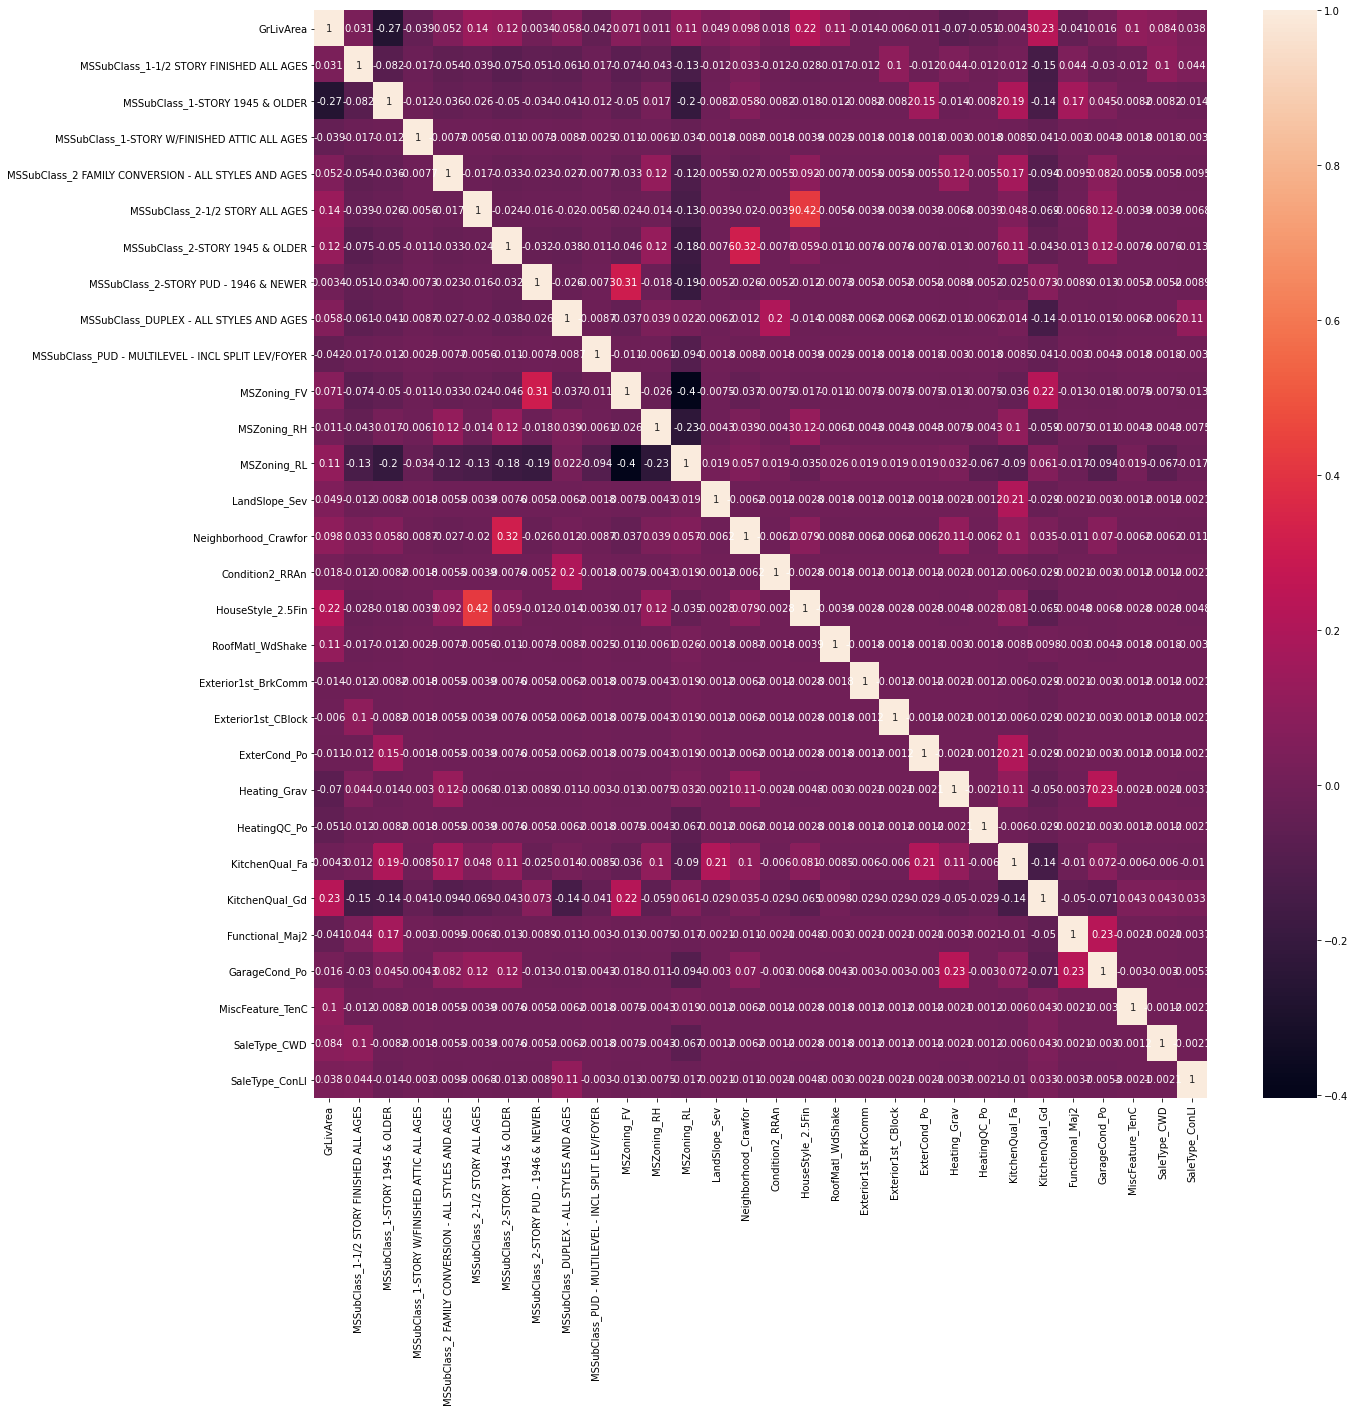

In [2687]:
#Checking for correlation in the X_train data
plt.figure(figsize=(20,20))
sns.heatmap(X_train_rfe.corr(),annot =True)

##### Obervation
The above heatmap shows the values of correlation are ranging from -0.4 to 0.42. Proceeding to calculate the VIF again to check how the multi collinarity has changed.

In [2688]:
#calculating the VIF again to check how the collinarity has changed
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
24                                     KitchenQual_Gd  1.92
12                                        MSZoning_RL  1.88
16                                  HouseStyle_2.5Fin  1.33
0                                           GrLivArea  1.28
10                                        MSZoning_FV  1.28
5                     MSSubClass_2-1/2 STORY ALL AGES  1.27
23                                     KitchenQual_Fa  1.27
2                     MSSubClass_1-STORY 1945 & OLDER  1.23
6                     MSSubClass_2-STORY 1945 & OLDER  1.21
14                               Neighborhood_Crawfor  1.21
26                                      GarageCond_Po  1.19
7               MSSubClass_2-STORY PUD - 1946 & NEWER  1.13
8             MSSubClass_DUPLEX - ALL STYLES AND AGES  1.12
21                                       Heating_Grav  1.12
25                                    Functional_Maj2  1.11
1            MSSubClass_1-1/2 STORY FINISHED ALL AGES  1.11
4   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...  1.10
11                                        MSZoning_RH  1.08
20                                       ExterCond_Po  1.07
13                                      LandSlope_Sev  1.06
15                                    Condition2_RRAn  1.04
28                                       SaleType_CWD  1.03
17                                   RoofMatl_WdShake  1.02
27                                   MiscFeature_TenC  1.02
29                                     SaleType_ConLI  1.02
19                                 Exterior1st_CBlock  1.01
22                                       HeatingQC_Po  1.00
18                                Exterior1st_BrkComm  1.00
9   MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/F...  1.00
3        MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.00

In [2689]:
#Dropping the column GarageQual_TA since it has a high VIF
X_train_rfe.drop("KitchenQual_Gd",axis=1, inplace=True)

##### Check corelation with heat map

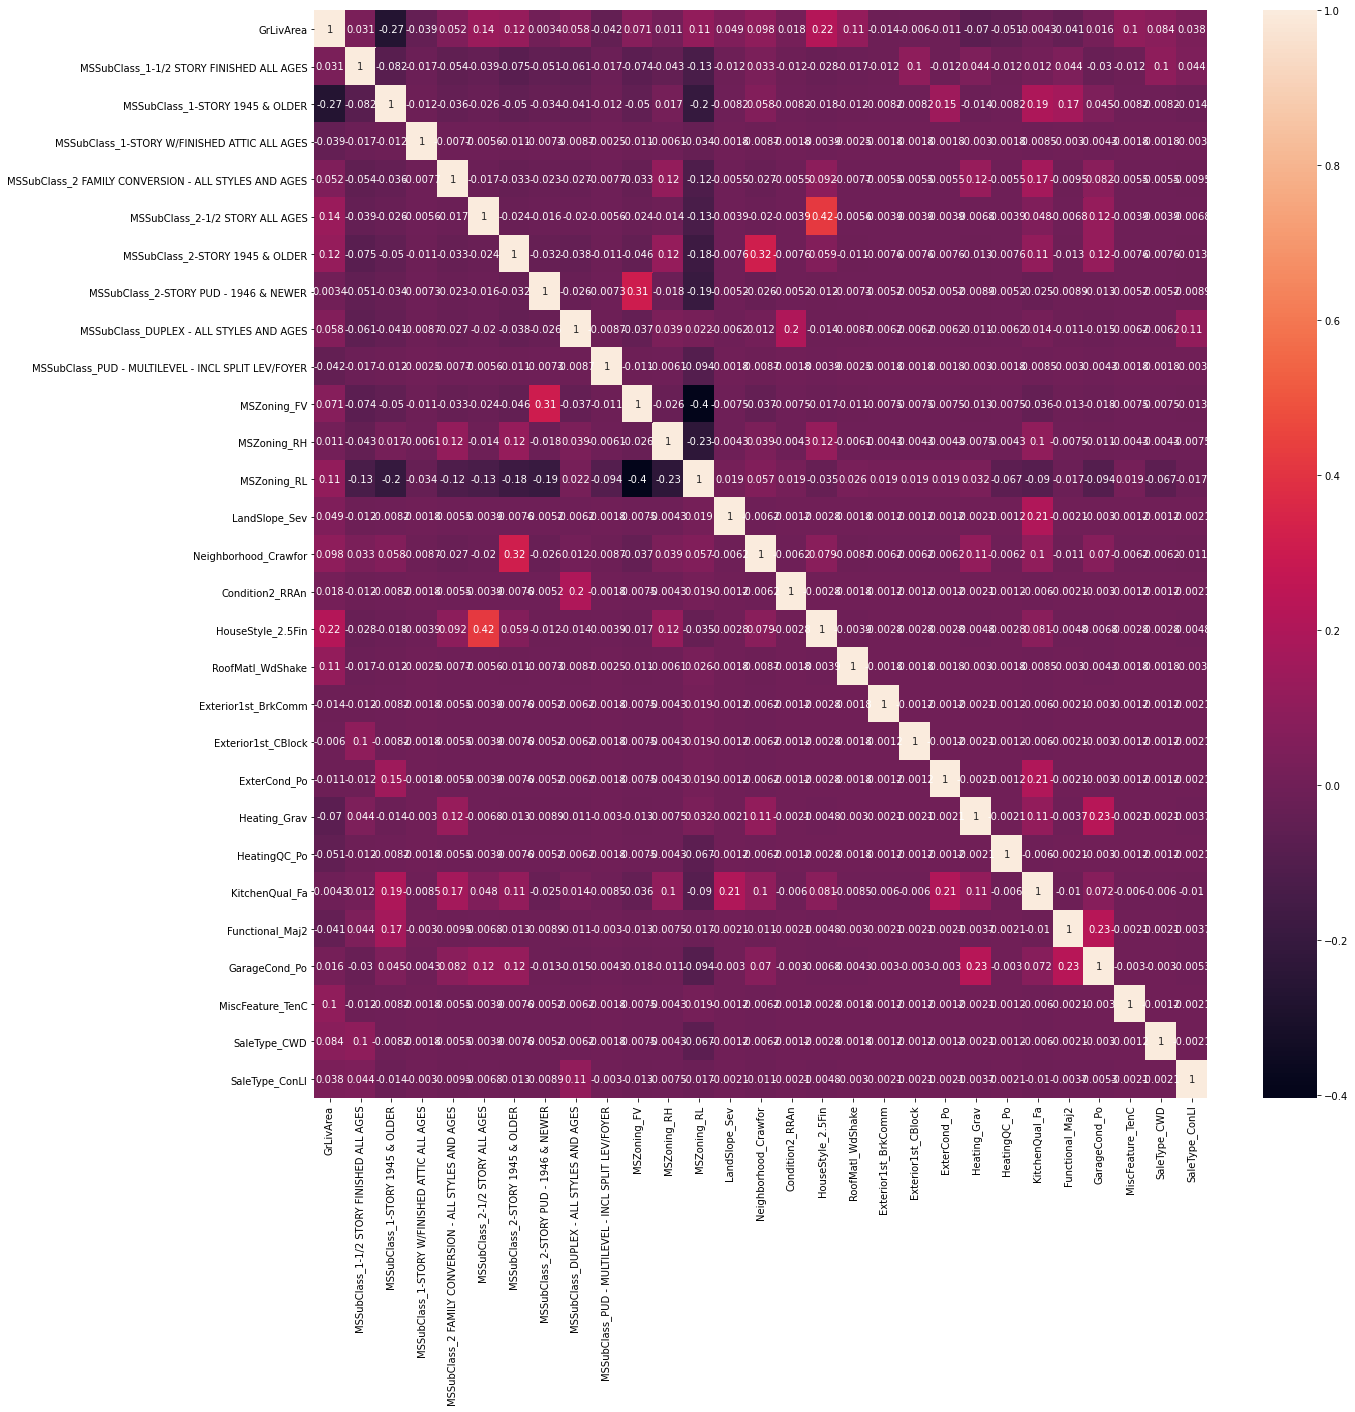

In [2690]:
#Checking for correlation in the X_train data
plt.figure(figsize=(20,20))
sns.heatmap(X_train_rfe.corr(),annot =True)

##### Obervation
The above heatmap shows the values of correlation are ranging from -0.4 to 0.42. Proceeding to calculate the VIF again to check how the multi collinarity has changed.

In [2691]:
#calculating the VIF again to check how the collinarity has changed
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
16                                  HouseStyle_2.5Fin  1.32
23                                     KitchenQual_Fa  1.27
5                     MSSubClass_2-1/2 STORY ALL AGES  1.27
0                                           GrLivArea  1.24
2                     MSSubClass_1-STORY 1945 & OLDER  1.23
6                     MSSubClass_2-STORY 1945 & OLDER  1.21
14                               Neighborhood_Crawfor  1.21
25                                      GarageCond_Po  1.19
12                                        MSZoning_RL  1.16
10                                        MSZoning_FV  1.13
7               MSSubClass_2-STORY PUD - 1946 & NEWER  1.12
21                                       Heating_Grav  1.12
24                                    Functional_Maj2  1.11
1            MSSubClass_1-1/2 STORY FINISHED ALL AGES  1.11
4   MSSubClass_2 FAMILY CONVERSION - ALL STYLES AN...  1.10
8             MSSubClass_DUPLEX - ALL STYLES AND AGES  1.10
11                                        MSZoning_RH  1.07
20                                       ExterCond_Po  1.07
13                                      LandSlope_Sev  1.06
15                                    Condition2_RRAn  1.04
27                                       SaleType_CWD  1.02
26                                   MiscFeature_TenC  1.02
28                                     SaleType_ConLI  1.02
17                                   RoofMatl_WdShake  1.02
19                                 Exterior1st_CBlock  1.01
3        MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES  1.00
22                                       HeatingQC_Po  1.00
9   MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/F...  1.00
18                                Exterior1st_BrkComm  1.00

##### Analysis
The values seen are less than 5 hence now lasso and ridge reguarization will be used. Checking the heat map below for correlation

##### Check corelation with heat map

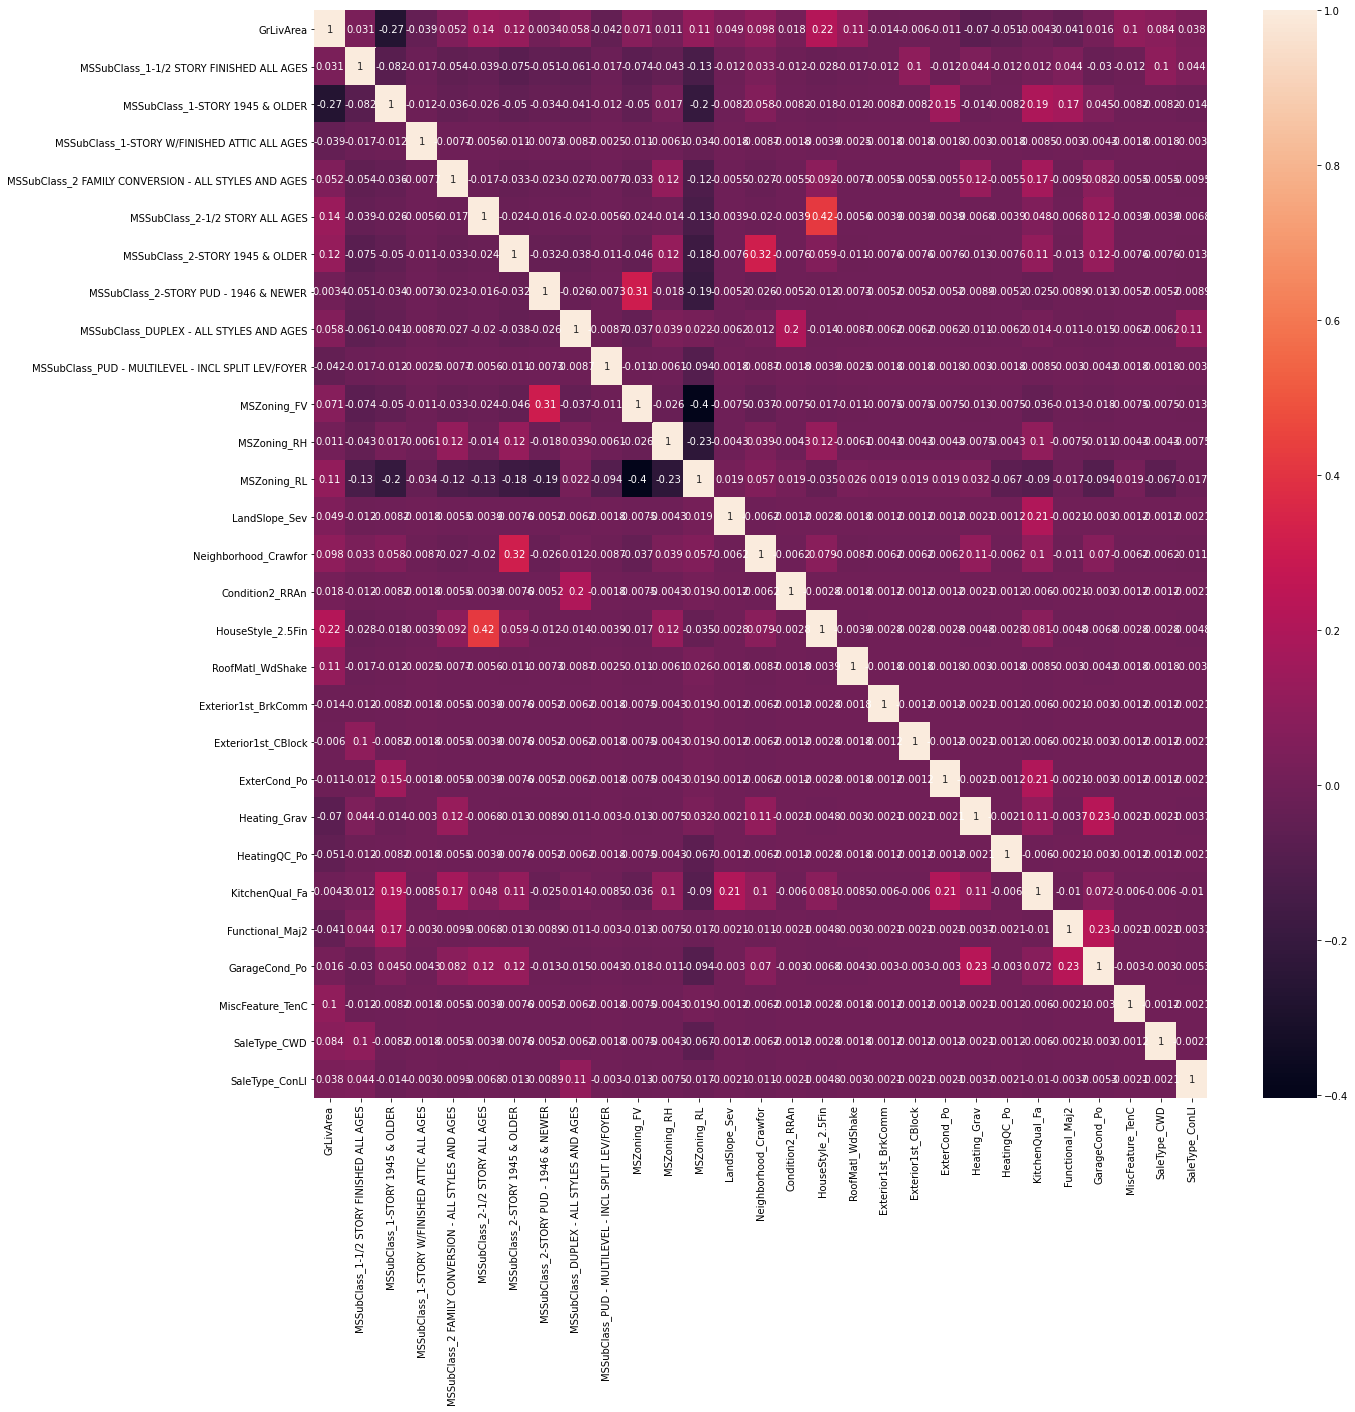

In [2692]:
#Checking for correlation in the X_train data
plt.figure(figsize=(20,20))
sns.heatmap(X_train_rfe.corr(),annot =True)

##### Obervation
The above heatmap shows the values of correlation are ranging from -0.4 to 0.42.

### Ridge Regression

A Ridge regression module from sklearn is now used to bulid the model. GridSearchCV is used to select the hyper parameter alpha 

###### GridSearch for hyper parameter 

In [2693]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
params_ridge={"alpha":[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
ridge = Ridge()
model_lasso_cv = GridSearchCV(estimator = ridge,
                       param_grid=params_ridge,
                       cv = 5,
                       scoring= 'neg_mean_absolute_error',
                       return_train_score =True,
                       verbose=1)
model_lasso_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

##### Best RidgeModel

###### What is the optimal value of alpha for ridge regression?

In [2694]:
model_lasso_cv.best_params_

{'alpha': 1.0}

In [2695]:
best_ridge_model = model_lasso_cv.best_estimator_
best_ridge_model

Ridge()

In [2696]:
best_ridge_model.fit(X_train_rfe,y_train)
best_ridge_model.coef_

array([ 0.66144007, -0.80549261, -0.70945871, -0.58843671, -0.79264883,
       -0.85161801, -0.8085271 , -0.57243127, -0.82419469,  0.17919691,
        0.71834948, -0.27356375,  0.27927148, -0.66634189,  0.68433573,
       -0.11376856, -1.03755776, -0.62045354, -1.41522716, -0.27930284,
       -0.5582178 , -0.55275594, -0.39191026, -0.34946438, -0.77957291,
       -0.52587224, -0.47345889, -0.61703914, -0.3174119 ])

###### Answer: 
The best value of alpha for ridge regression is 1

In [2697]:
y_train_pred_ridge = best_ridge_model.predict(X_train_rfe)
X_test_rfe = X_test[X_train_rfe.columns]
y_test_pred_ridge = best_ridge_model.predict(X_test_rfe)

In [2698]:
from sklearn.metrics import mean_squared_error,r2_score
print("Root Mean_squared_error for train set with ridge  model is ",np.sqrt(mean_squared_error(y_train,y_train_pred_ridge)))
print("Root Mean_squared_error for test set with ridge  model is ",np.sqrt(mean_squared_error(y_test,y_test_pred_ridge)))
print("R2 score for train set with ridge  model",r2_score(y_train,y_train_pred_ridge))
print("R2 score for test set  with ridge  model",r2_score(y_test,y_test_pred_ridge))

Root Mean_squared_error for train set with ridge  model is  0.5414494702519478
Root Mean_squared_error for test set with ridge  model is  0.5734976622590826
R2 score for train set with ridge  model 0.7068324711638851
R2 score for test set  with ridge  model 0.6817582155194013


###### What will be the changes in the model if you choose double the value of alpha for ridge?

In [2699]:
double_alpha = 2*1
ridge_double_alpha = Ridge(alpha=double_alpha)
ridge_double_alpha.fit(X_train_rfe,y_train)


Ridge(alpha=2)

The results are summarised in the table at the end

### Lasso Regression

###### GridSearch for hyper parameter 

In [2700]:
from sklearn.linear_model import Lasso
lasso = Lasso()
params_lasso={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
model_lasso_cv = GridSearchCV( estimator = lasso,
                               param_grid=params_lasso,
                               cv = 5,
                               scoring= 'neg_mean_absolute_error',
                               return_train_score =True,
                               verbose=1)
model_lasso_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2701]:
cv_results = pd.DataFrame(model_lasso_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006396      0.000799         0.004597        0.000490      0.0001   
1       0.006196      0.000747         0.003398        0.000800       0.001   
2       0.005597      0.000801         0.003397        0.000489        0.01   
3       0.005796      0.000979         0.002998        0.000632        0.05   
4       0.004197      0.000400         0.002408        0.000482         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.414117          -0.412430          -0.404001   
1   {'alpha': 0.001}          -0.421646          -0.409430          -0.398304   
2    {'alpha': 0.01}          -0.455213          -0.450035          -0.443357   
3    {'alpha': 0.05}          -0.518532          -0.514959          -0.557652   
4     {'alpha': 0.1}          -0.545465          -0.553866          -0.593765   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.437215          -0.415418        -0.416636        0.011033   
1          -0.440633          -0.414536        -0.416910        0.014092   
2          -0.492518          -0.418490        -0.451922        0.023889   
3          -0.598596          -0.477531        -0.533454        0.041282   
4          -0.637268          -0.518878        -0.569848        0.041389   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.389610           -0.393011   
1                2           -0.397412           -0.399973   
2                3           -0.438144           -0.443987   
3                4           -0.529268           -0.530479   
4                5           -0.569638           -0.575682   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.393124           -0.388691           -0.395285   
1           -0.400663           -0.393876           -0.402098   
2           -0.449676           -0.436094           -0.441050   
3           -0.528967           -0.518715           -0.541088   
4           -0.564414           -0.551492           -0.579065   

   mean_train_score  std_train_score  
0         -0.391944         0.002438  
1         -0.398804         0.002895  
2         -0.441790         0.004760  
3         -0.529704         0.007095  
4         -0.568058         0.009690

##### Best Lasso model

In [2702]:
best_lasso_model = model_lasso_cv.best_estimator_
best_lasso_model

Lasso(alpha=0.0001)

###### What is the optimal value of alpha for lasso regression?

In [2703]:
model_lasso_cv.best_params_

{'alpha': 0.0001}

###### Answer: 
The best value of alpha for lasso regression is 0.0001

In [2704]:
y_train_pred_lasso = best_lasso_model.predict(X_train_rfe)
y_test_pred_lasso = best_lasso_model.predict(X_test_rfe)

In [2705]:
from sklearn.metrics import mean_squared_error,r2_score
print("Root Mean_squared_error for train set with lasso model is ",round(np.sqrt(mean_squared_error(y_train,y_train_pred_lasso)),2))
print("Root Mean_squared_error for test set with lasso model is ",round(np.sqrt(mean_squared_error(y_test,y_test_pred_lasso)),2))
print("R2 score for train set with lasso model is",r2_score(y_train,y_train_pred_lasso))
print("R2 score for test set with lasso model is",r2_score(y_test,y_test_pred_lasso))

Root Mean_squared_error for train set with lasso model is  0.54
Root Mean_squared_error for test set with lasso model is  0.59
R2 score for train set with lasso model is 0.7129820463140404
R2 score for test set with lasso model is 0.6654457104525044


###### What will be the changes in the model if you choose double the value of alpha for lasso?

In [2706]:
#Doubling the alpha and fitting the lasso model
double_alpha = 2*0.0001
lasso_double_alpha = Lasso(alpha=double_alpha)
lasso_double_alpha.fit(X_train_rfe,y_train)


Lasso(alpha=0.0002)

In [2707]:
#Creating a data frame to compare the coefficient values of ridge and lasoo with best value of alpha and 2*alpha
betas = pd.DataFrame(index=X_train_rfe.columns)
betas.rows = X_train_rfe.columns
betas['Ridge'] = best_ridge_model.coef_
betas['Ridge with 2alpha'] = ridge_double_alpha.coef_
betas['Lasso'] = best_lasso_model.coef_
betas['Lasso with 2alpha'] = lasso_double_alpha.coef_

In [2708]:
betas

Ridge  \
GrLivArea                                           0.661440   
MSSubClass_1-1/2 STORY FINISHED ALL AGES           -0.805493   
MSSubClass_1-STORY 1945 & OLDER                    -0.709459   
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES       -0.588437   
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND... -0.792649   
MSSubClass_2-1/2 STORY ALL AGES                    -0.851618   
MSSubClass_2-STORY 1945 & OLDER                    -0.808527   
MSSubClass_2-STORY PUD - 1946 & NEWER              -0.572431   
MSSubClass_DUPLEX - ALL STYLES AND AGES            -0.824195   
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER  0.179197   
MSZoning_FV                                         0.718349   
MSZoning_RH                                        -0.273564   
MSZoning_RL                                         0.279271   
LandSlope_Sev                                      -0.666342   
Neighborhood_Crawfor                                0.684336   
Condition2_RRAn                                    -0.113769   
HouseStyle_2.5Fin                                  -1.037558   
RoofMatl_WdShake                                   -0.620454   
Exterior1st_BrkComm                                -1.415227   
Exterior1st_CBlock                                 -0.279303   
ExterCond_Po                                       -0.558218   
Heating_Grav                                       -0.552756   
HeatingQC_Po                                       -0.391910   
KitchenQual_Fa                                     -0.349464   
Functional_Maj2                                    -0.779573   
GarageCond_Po                                      -0.525872   
MiscFeature_TenC                                   -0.473459   
SaleType_CWD                                       -0.617039   
SaleType_ConLI                                     -0.317412   

                                                    Ridge with 2alpha  \
GrLivArea                                                    0.655252   
MSSubClass_1-1/2 STORY FINISHED ALL AGES                    -0.784709   
MSSubClass_1-STORY 1945 & OLDER                             -0.686838   
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES                -0.434884   
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND...          -0.747176   
MSSubClass_2-1/2 STORY ALL AGES                             -0.792594   
MSSubClass_2-STORY 1945 & OLDER                             -0.757581   
MSSubClass_2-STORY PUD - 1946 & NEWER                       -0.520654   
MSSubClass_DUPLEX - ALL STYLES AND AGES                     -0.781042   
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER           0.145052   
MSZoning_FV                                                  0.714777   
MSZoning_RH                                                 -0.256164   
MSZoning_RL                                                  0.296931   
LandSlope_Sev                                               -0.430758   
Neighborhood_Crawfor                                         0.634943   
Condition2_RRAn                                             -0.086217   
HouseStyle_2.5Fin                                           -0.896889   
RoofMatl_WdShake                                            -0.453845   
Exterior1st_BrkComm                                         -0.941330   
Exterior1st_CBlock                                          -0.190524   
ExterCond_Po                                                -0.369776   
Heating_Grav                                                -0.446201   
HeatingQC_Po                                                -0.255408   
KitchenQual_Fa                                              -0.372314   
Functional_Maj2                                             -0.636769   
GarageCond_Po                                               -0.494576   
MiscFeature_TenC                                            -0.306548   
SaleType_CWD                                                -0.404496   
SaleType_ConLI   

In [2709]:
#To find the most important predictor variables the absolute values of coefficients were arranged in descending order
#The absolute values of coefficients when the Ridge regression model is used with best alpha 
betas["Ridge"].abs().sort_values(ascending=False)


Exterior1st_BrkComm                                     1.415227
HouseStyle_2.5Fin                                       1.037558
MSSubClass_2-1/2 STORY ALL AGES                         0.851618
MSSubClass_DUPLEX - ALL STYLES AND AGES                 0.824195
MSSubClass_2-STORY 1945 & OLDER                         0.808527
MSSubClass_1-1/2 STORY FINISHED ALL AGES                0.805493
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES    0.792649
Functional_Maj2                                         0.779573
MSZoning_FV                                             0.718349
MSSubClass_1-STORY 1945 & OLDER                         0.709459
Neighborhood_Crawfor                                    0.684336
LandSlope_Sev                                           0.666342
GrLivArea                                               0.661440
RoofMatl_WdShake                                        0.620454
SaleType_CWD                                            0.617039
MSSubClass_1-STORY W/FINI

In [2710]:
#To find the most important predictor variables the absolute values of coefficients were arranged in descending order
#The absolute values of coefficients when the Ridge regression model is used with double the value of alpha
betas["Ridge with 2alpha"].abs().sort_values(ascending=False)

Exterior1st_BrkComm                                     0.941330
HouseStyle_2.5Fin                                       0.896889
MSSubClass_2-1/2 STORY ALL AGES                         0.792594
MSSubClass_1-1/2 STORY FINISHED ALL AGES                0.784709
MSSubClass_DUPLEX - ALL STYLES AND AGES                 0.781042
MSSubClass_2-STORY 1945 & OLDER                         0.757581
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES    0.747176
MSZoning_FV                                             0.714777
MSSubClass_1-STORY 1945 & OLDER                         0.686838
GrLivArea                                               0.655252
Functional_Maj2                                         0.636769
Neighborhood_Crawfor                                    0.634943
MSSubClass_2-STORY PUD - 1946 & NEWER                   0.520654
GarageCond_Po                                           0.494576
RoofMatl_WdShake                                        0.453845
Heating_Grav             

In [2711]:
#To find the most important predictor variables the absolute values of coefficients were arranged in descending order
#The absolute values of coefficients when the Lasso regression model is used with the best value of alpha =2
betas["Lasso"].abs().sort_values(ascending=False)

Exterior1st_BrkComm                                     2.758490
LandSlope_Sev                                           1.344322
HouseStyle_2.5Fin                                       1.235570
SaleType_CWD                                            1.192143
ExterCond_Po                                            1.091265
Functional_Maj2                                         1.001819
RoofMatl_WdShake                                        0.926662
MSSubClass_2-1/2 STORY ALL AGES                         0.915363
MiscFeature_TenC                                        0.909580
MSSubClass_DUPLEX - ALL STYLES AND AGES                 0.875696
MSSubClass_2-STORY 1945 & OLDER                         0.872374
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES            0.858196
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES    0.849994
MSSubClass_1-1/2 STORY FINISHED ALL AGES                0.826245
Neighborhood_Crawfor                                    0.731884
MSSubClass_1-STORY 1945 &

In [2712]:
#To find the most important predictor variables the absolute values of coefficients were arranged in descending order
#The absolute values of coefficients when the Lasso regression model is used with the best value of alpha =2
betas["Lasso with 2alpha"].abs().sort_values(ascending=False)

Exterior1st_BrkComm                                     2.676497
LandSlope_Sev                                           1.252979
HouseStyle_2.5Fin                                       1.219554
SaleType_CWD                                            1.105353
ExterCond_Po                                            1.003341
Functional_Maj2                                         0.976302
MSSubClass_2-1/2 STORY ALL AGES                         0.907221
RoofMatl_WdShake                                        0.881428
MSSubClass_DUPLEX - ALL STYLES AND AGES                 0.874362
MSSubClass_2-STORY 1945 & OLDER                         0.865747
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES    0.844541
MSSubClass_1-1/2 STORY FINISHED ALL AGES                0.825184
MiscFeature_TenC                                        0.822938
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES            0.816190
MSSubClass_1-STORY 1945 & OLDER                         0.727464
Neighborhood_Crawfor     

##### After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [2713]:
# the list of top 5 features according to lasso model
lasso_top_five = ["Exterior1st_BrkComm", "LandSlope_Sev","HouseStyle_2.5Fin","SaleType_CWD","ExterCond_Po"]

In [2714]:
#removing the top 5 features from the columns list to build a new lass model
new_lasso_columns = list(set(X_train_rfe.columns)-set(lasso_top_five))
new_lasso_columns

['Exterior1st_CBlock',
 'MSZoning_RL',
 'GrLivArea',
 'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
 'GarageCond_Po',
 'MiscFeature_TenC',
 'RoofMatl_WdShake',
 'MSZoning_RH',
 'KitchenQual_Fa',
 'Neighborhood_Crawfor',
 'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
 'MSSubClass_2-STORY 1945 & OLDER',
 'HeatingQC_Po',
 'MSSubClass_2-1/2 STORY ALL AGES',
 'Heating_Grav',
 'MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES',
 'MSSubClass_2-STORY PUD - 1946 & NEWER',
 'MSZoning_FV',
 'MSSubClass_1-1/2 STORY FINISHED ALL AGES',
 'MSSubClass_DUPLEX - ALL STYLES AND AGES',
 'MSSubClass_1-STORY 1945 & OLDER',
 'Condition2_RRAn',
 'Functional_Maj2',
 'SaleType_ConLI']

In [2715]:
#X_new_lasso now has the predictor variables dataframe without the top 5 features of previous lasso model
X_new_lasso  = X_train_rfe[new_lasso_columns]

In [2723]:
#Building the lasso model with the new predictors train set
lasso = Lasso()
params_lasso={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]}
model_lasso_cv_new = GridSearchCV( estimator = lasso,
                               param_grid=params_lasso,
                               cv = 5,
                               scoring= 'neg_mean_absolute_error',
                               return_train_score =True,
                               verbose=1)
model_lasso_cv_new.fit(X_new_lasso,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [2724]:
#Checking the results
cv_results_new = pd.DataFrame(model_lasso_cv_new.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.006396      0.000799         0.004597        0.000490      0.0001   
1       0.006196      0.000747         0.003398        0.000800       0.001   
2       0.005597      0.000801         0.003397        0.000489        0.01   
3       0.005796      0.000979         0.002998        0.000632        0.05   
4       0.004197      0.000400         0.002408        0.000482         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.414117          -0.412430          -0.404001   
1   {'alpha': 0.001}          -0.421646          -0.409430          -0.398304   
2    {'alpha': 0.01}          -0.455213          -0.450035          -0.443357   
3    {'alpha': 0.05}          -0.518532          -0.514959          -0.557652   
4     {'alpha': 0.1}          -0.545465          -0.553866          -0.593765   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.437215          -0.415418        -0.416636        0.011033   
1          -0.440633          -0.414536        -0.416910        0.014092   
2          -0.492518          -0.418490        -0.451922        0.023889   
3          -0.598596          -0.477531        -0.533454        0.041282   
4          -0.637268          -0.518878        -0.569848        0.041389   

   rank_test_score  split0_train_score  split1_train_score  \
0                1           -0.389610           -0.393011   
1                2           -0.397412           -0.399973   
2                3           -0.438144           -0.443987   
3                4           -0.529268           -0.530479   
4                5           -0.569638           -0.575682   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.393124           -0.388691           -0.395285   
1           -0.400663           -0.393876           -0.402098   
2           -0.449676           -0.436094           -0.441050   
3           -0.528967           -0.518715           -0.541088   
4           -0.564414           -0.551492           -0.579065   

   mean_train_score  std_train_score  
0         -0.391944         0.002438  
1         -0.398804         0.002895  
2         -0.441790         0.004760  
3         -0.529704         0.007095  
4         -0.568058         0.009690

In [2725]:
#Checking the best valuee for the parameter alpha
model_lasso_cv_new.best_params_

{'alpha': 0.0001}

In [2726]:
# Checking the best model derived from gridsearch
best_lasso_model_new = model_lasso_cv_new.best_estimator_
best_lasso_model_new

Lasso(alpha=0.0001)

In [2727]:
#Checking the coefficients of the new model
best_lasso_model_new.coef_

array([-0.46054236,  0.24472578,  0.64975722, -0.87716177, -0.44272817,
       -0.83633516, -0.86863814, -0.37039939, -0.41016222,  0.71813045,
        0.17887515, -0.8744556 , -0.75940225, -1.25732939, -0.71100191,
       -0.87363692, -0.63060727,  0.71411728, -0.82975338, -0.85399005,
       -0.75609796, -0.11593524, -1.02546059, -0.38752767])

In [2728]:
#Creating a data frame to check the coefficients
new_betas = pd.DataFrame(index=X_new_lasso.columns)
new_betas.rows = X_new_lasso.columns
new_betas['New Lasso'] = best_lasso_model_new.coef_
new_betas

New Lasso
Exterior1st_CBlock                                  -0.460542
MSZoning_RL                                          0.244726
GrLivArea                                            0.649757
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND...  -0.877162
GarageCond_Po                                       -0.442728
MiscFeature_TenC                                    -0.836335
RoofMatl_WdShake                                    -0.868638
MSZoning_RH                                         -0.370399
KitchenQual_Fa                                      -0.410162
Neighborhood_Crawfor                                 0.718130
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER   0.178875
MSSubClass_2-STORY 1945 & OLDER                     -0.874456
HeatingQC_Po                                        -0.759402
MSSubClass_2-1/2 STORY ALL AGES                     -1.257329
Heating_Grav                                        -0.711002
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES        -0.873637
MSSubClass_2-STORY PUD - 1946 & NEWER               -0.630607
MSZoning_FV                                          0.714117
MSSubClass_1-1/2 STORY FINISHED ALL AGES            -0.829753
MSSubClass_DUPLEX - ALL STYLES AND AGES             -0.853990
MSSubClass_1-STORY 1945 & OLDER                     -0.756098
Condition2_RRAn                                     -0.115935
Functional_Maj2                                     -1.025461
SaleType_ConLI                                      -0.387528

In [2722]:
#To find the most important predictor variables the absolute values of coefficients were arranged in descending order
#The absolute values of coefficients when the Lasso regression model is used with the best value of alpha 
new_betas['New Lasso'].abs().sort_values(ascending=False)

MSSubClass_2-1/2 STORY ALL AGES                         1.257329
Functional_Maj2                                         1.025461
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES    0.877162
MSSubClass_2-STORY 1945 & OLDER                         0.874456
MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES            0.873637
RoofMatl_WdShake                                        0.868638
MSSubClass_DUPLEX - ALL STYLES AND AGES                 0.853990
MiscFeature_TenC                                        0.836335
MSSubClass_1-1/2 STORY FINISHED ALL AGES                0.829753
HeatingQC_Po                                            0.759402
MSSubClass_1-STORY 1945 & OLDER                         0.756098
Neighborhood_Crawfor                                    0.718130
MSZoning_FV                                             0.714117
Heating_Grav                                            0.711002
GrLivArea                                               0.649757
MSSubClass_2-STORY PUD - 